In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

sns.set() 

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.unicode_minus'] = False 

# 결측치 시각화를 위한 라이브러리
import missingno 

# 데이터 전처리 알고리즘 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 

# 학습용과 검증용으로 나누는  함수 
from sklearn.model_selection import train_test_split 

# 교차검증 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한도구 
from sklearn.model_selection import GridSearchCV 

# 머신러닝 알고리즘 - 분류 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier 
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from lightgbm import LGBMRegressor 
from xgboost import XGBRegressor 
from sklearn.ensemble import VotingRegressor 

# 학습 모델 저장을 위한 라이브러리
import pickle 

In [2]:
train_df = pd.read_parquet(r'C:\Users\SAMSUNG\OneDrive\바탕 화면\파이널 프로젝트 데이터\train\6.채널정보\201812_train_채널정보.parquet')
test_df = pd.read_parquet(r'C:\Users\SAMSUNG\OneDrive\바탕 화면\파이널 프로젝트 데이터\test\6.채널정보\201812_test_채널정보.parquet')

In [3]:
all_df = pd.concat([train_df, test_df])
all_df.reset_index(inplace=True, drop=True)

# 컬럼명이 데이터로 들어간 행 제거
all_df = all_df[all_df['기준년월'] != '기준년월']

all_df

기준년월            ID 인입횟수_ARS_R6M 이용메뉴건수_ARS_R6M  인입일수_ARS_R6M  \
0       201812  TRAIN_000000       10회 이상         30회 이상            12   
1       201812  TRAIN_000001        1회 이상          1회 이상             0   
2       201812  TRAIN_000002        1회 이상          1회 이상             1   
3       201812  TRAIN_000003       10회 이상         30회 이상            12   
4       201812  TRAIN_000004        1회 이상          1회 이상             0   
...        ...           ...          ...            ...           ...   
499995  201812    TEST_99995        1회 이상          1회 이상             0   
499996  201812    TEST_99996        1회 이상          1회 이상             0   
499997  201812    TEST_99997        1회 이상          1회 이상             0   
499998  201812    TEST_99998        1회 이상          1회 이상             0   
499999  201812    TEST_99999        1회 이상          1회 이상             0   

        인입월수_ARS_R6M  인입후경과월_ARS  인입횟수_ARS_B0M  이용메뉴건수_ARS_B0M  인입일수_ARS_B0M  \
0                  6           0             2               6             2   
1                  0           0             0               0             0   
2                  1           5             0               0             0   
3                  6           0             2               6             2   
4                  0           0             0               0             0   
...              ...         ...           ...             ...           ...   
499995             0           0             0               0             0   
499996             0           0             0               0             0   
499997             0           0             0               0             0   
499998             0           0             0               0             0   
499999             0           0             0               0             0   

        ... 당사PAY_방문횟수_R6M 당사PAY_방문월수_R6M  당사멤버쉽_방문횟수_B0M  당사멤버쉽_방문횟수_R6M  \
0       ...              0              0              23             136   
1       ...              0              0               0               0   
2       ...              0              0               0               0   
3       ...              0              0              45             219   
4       ...              0              0               0               0   
...     ...            ...            ...             ...             ...   
499995  ...              0              0               0               0   
499996  ...              0              0               0               0   
499997  ...              0              0               0               0   
499998  ...              0              0               0               0   
499999  ...              0              0               0               0   

       당사멤버쉽_방문월수_R6M   OS구분코드  홈페이지_금융건수_R6M  홈페이지_선결제건수_R6M  홈페이지_금융건수_R3M  \
0                   6  Android              0               0              0   
1                   0     None              0               0              0   
2                   0  Android             12              10              6   
3                   6  Android              0               0              0   
4                   0  Android              0               0              0   
...               ...      ...            ...             ...            ...   
499995              0     None              0               0              0   
499996              0     None              3               7              3   
499997              0     None              0               0              0   
499998              0  Android              7              22              4   
499999              0     None              0               0              0   

        홈페이지_선결제건수_R3M  
0                    0  
1                    0  
2                    6  
3                    0  
4                    0  
...                ...  
499995               0  
499996               3  
499997               0  
499998              12  

In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 105 entries, 기준년월 to 홈페이지_선결제건수_R3M
dtypes: int64(98), object(7)
memory usage: 400.5+ MB


결측치 확인 

In [5]:
# 결측치 확인 
all_df.isna().sum()

기준년월                   0
ID                     0
인입횟수_ARS_R6M           0
이용메뉴건수_ARS_R6M         0
인입일수_ARS_R6M           0
                   ...  
OS구분코드            340203
홈페이지_금융건수_R6M          0
홈페이지_선결제건수_R6M         0
홈페이지_금융건수_R3M          0
홈페이지_선결제건수_R3M         0
Length: 105, dtype: int64

숫자형(int64/float63) 데이터의 이상치 및 분포확인 

In [6]:
def analyze_column(all_df, bins=50):
    numeric_cols = all_df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:

        # 히스토그램 
        print(f'{col}의 히스토그램')
        plt.figure(figsize=(10, 4))
        sns.histplot(data=all_df, x=col, bins=bins, kde=True, edgecolor='black')
        plt.title(f'{col}의 히스토그램')
        plt.xlabel(col)
        plt.ylabel('빈도수')
        plt.grid(True)
        plt.show()

        # 박스플롯 
        print(f'{col}의 박스플롯')
        plt.figure(figsize=(10, 2))
        sns.boxplot(data=all_df, x=col)
        plt.title(f'{col}의 박스플롯')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

        print("─\n" * 150) 

기준년월의 히스토그램


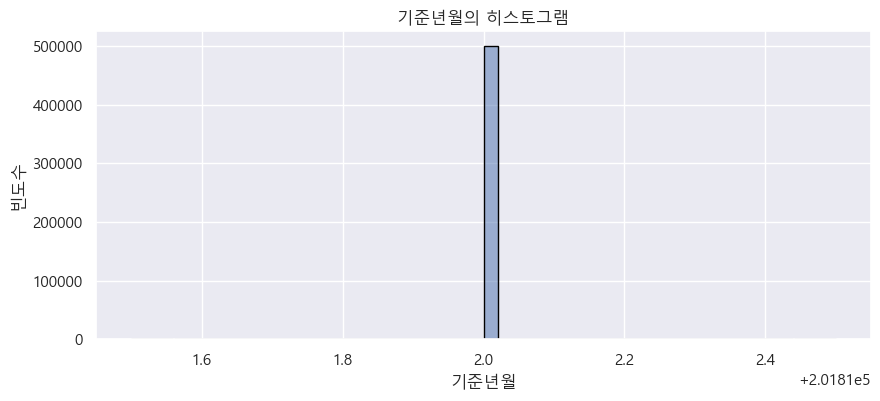

기준년월의 박스플롯


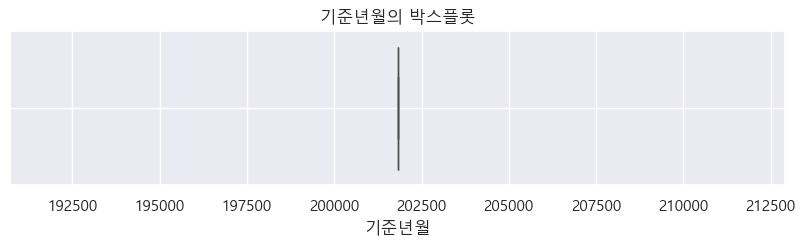

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입일수_ARS_R6M의 히스토그램


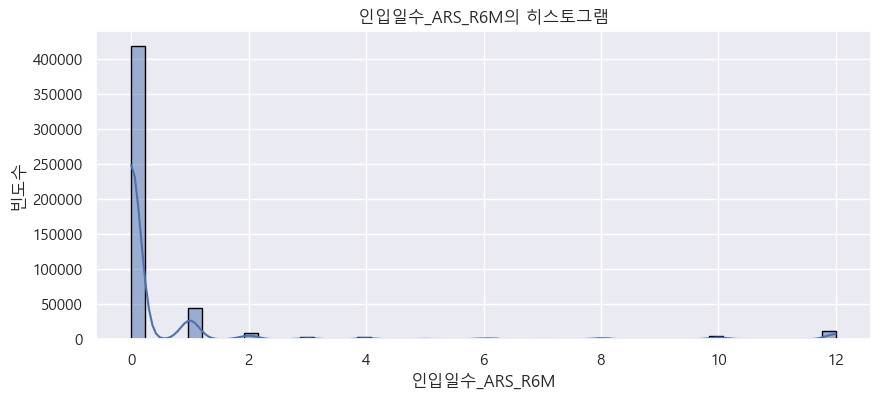

인입일수_ARS_R6M의 박스플롯


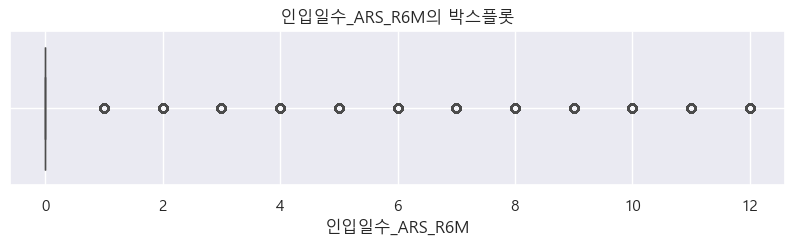

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입월수_ARS_R6M의 히스토그램


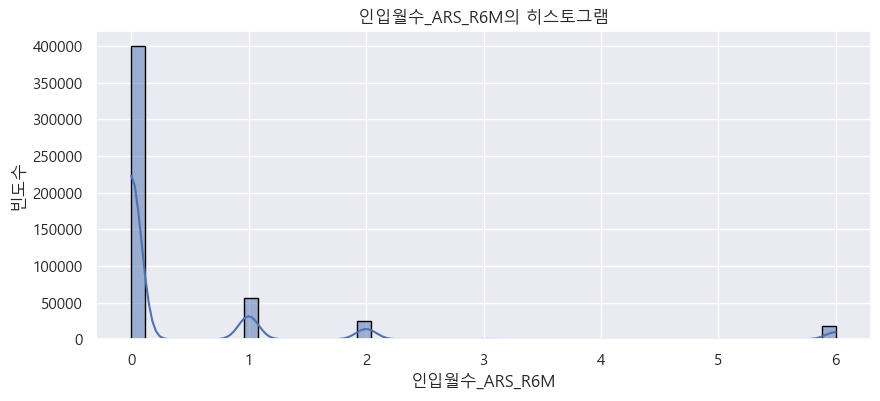

인입월수_ARS_R6M의 박스플롯


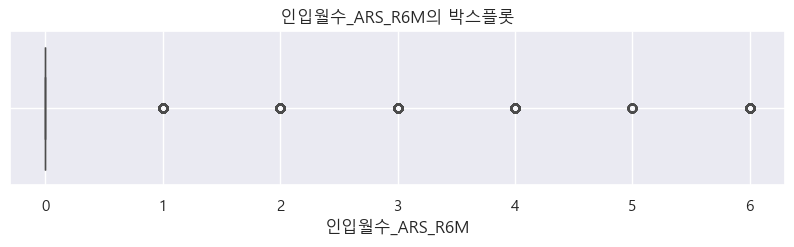

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입후경과월_ARS의 히스토그램


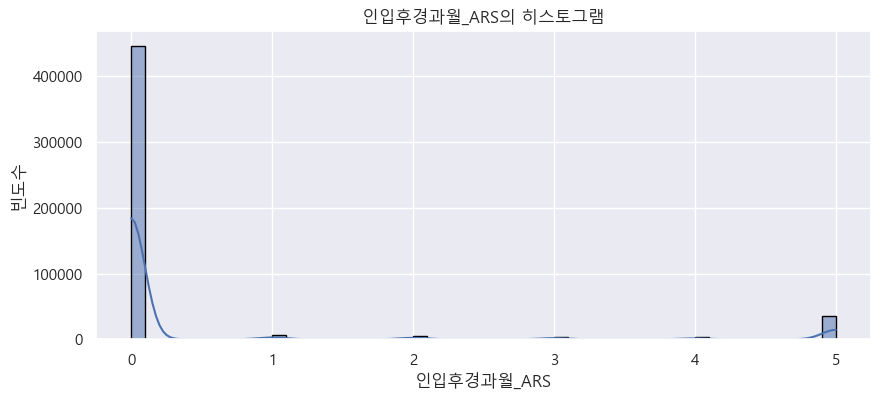

인입후경과월_ARS의 박스플롯


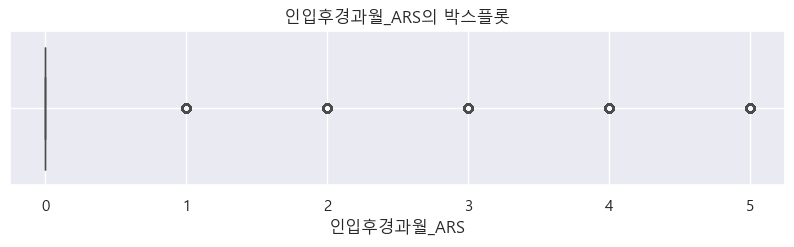

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입횟수_ARS_B0M의 히스토그램


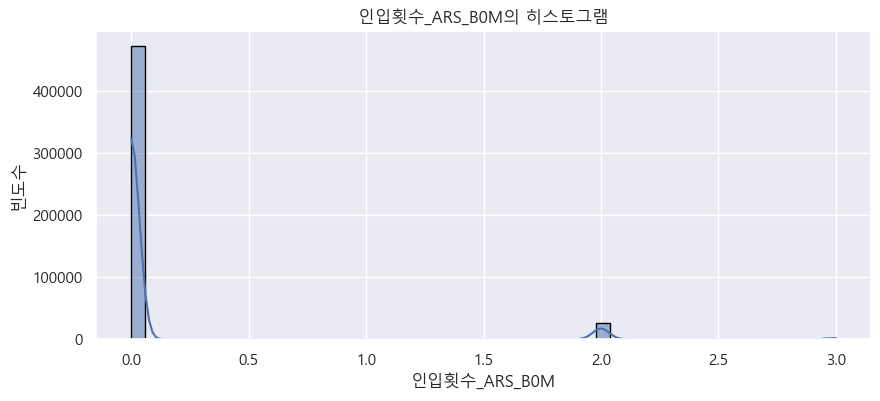

인입횟수_ARS_B0M의 박스플롯


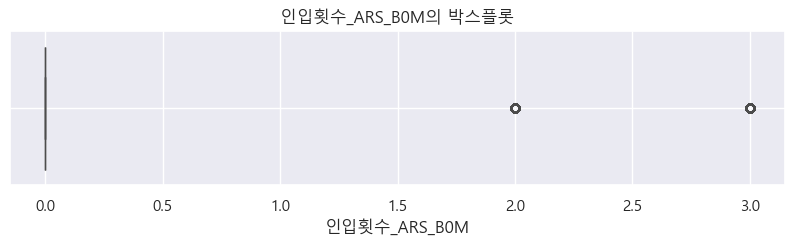

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

이용메뉴건수_ARS_B0M의 히스토그램


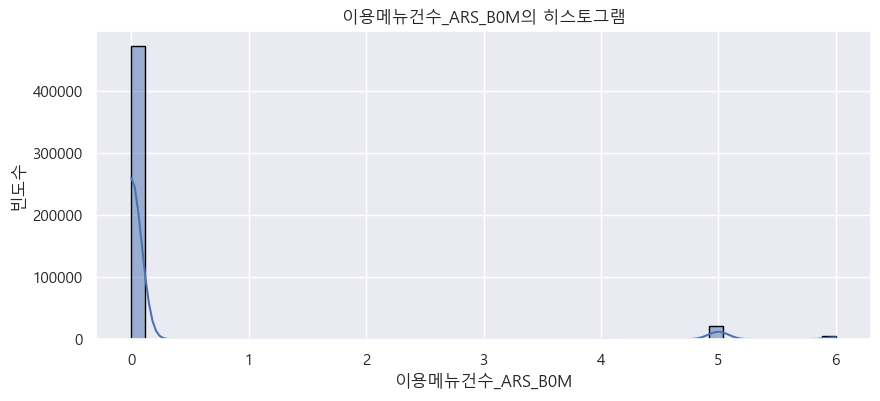

이용메뉴건수_ARS_B0M의 박스플롯


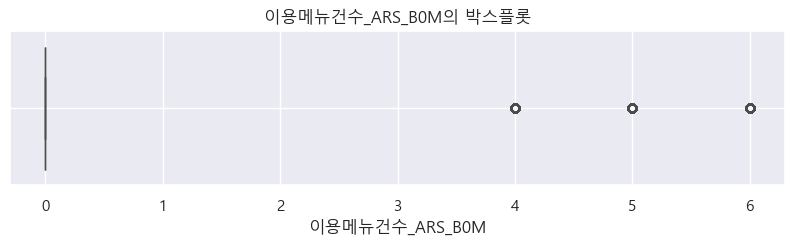

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입일수_ARS_B0M의 히스토그램


인입일수_ARS_B0M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문월수_PC_R6M의 히스토그램


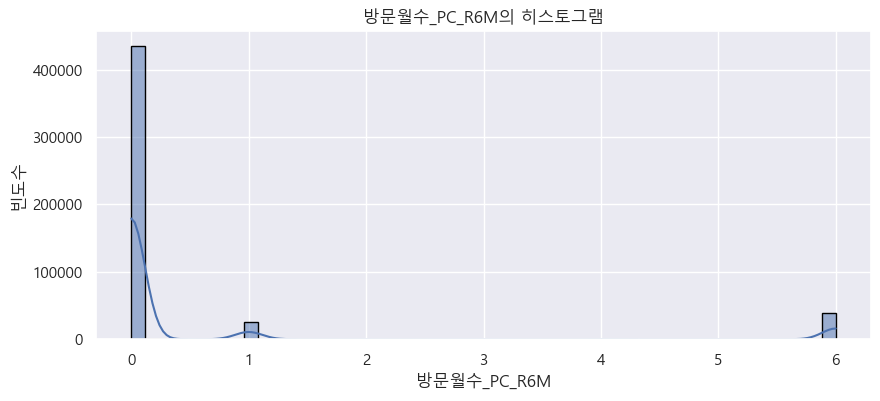

방문월수_PC_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문후경과월_PC_R6M의 히스토그램


방문후경과월_PC_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문일수_앱_R6M의 히스토그램


방문일수_앱_R6M의 박스플롯


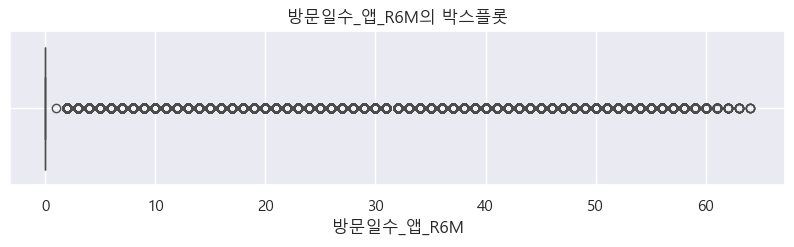

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문월수_앱_R6M의 히스토그램


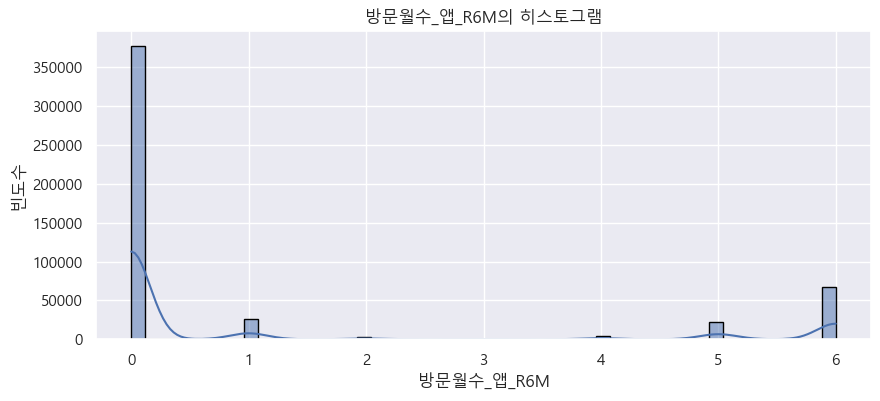

방문월수_앱_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문후경과월_앱_R6M의 히스토그램


방문후경과월_앱_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문횟수_모바일웹_R6M의 히스토그램


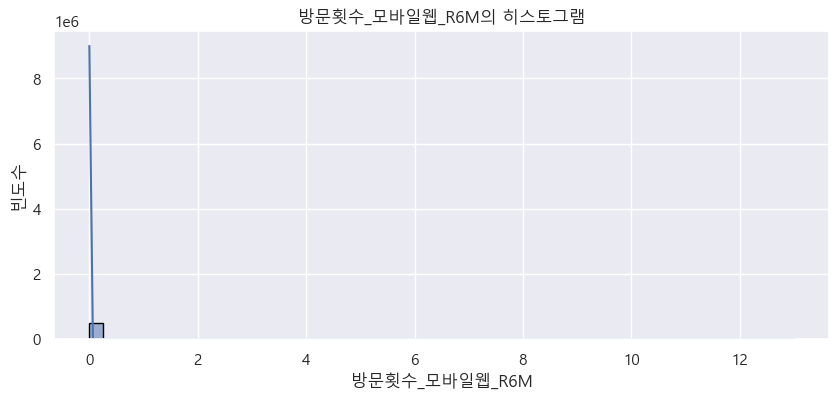

방문횟수_모바일웹_R6M의 박스플롯


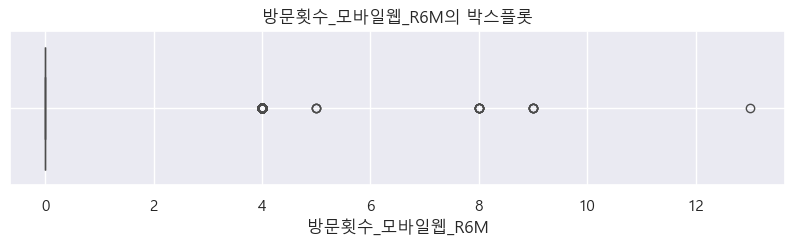

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문일수_모바일웹_R6M의 히스토그램


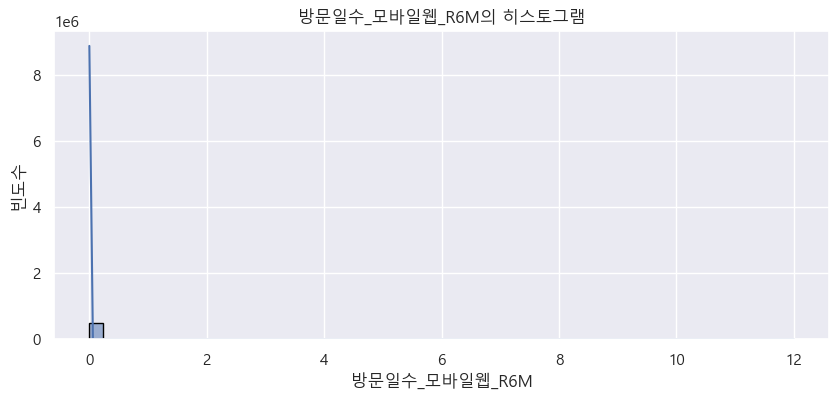

방문일수_모바일웹_R6M의 박스플롯


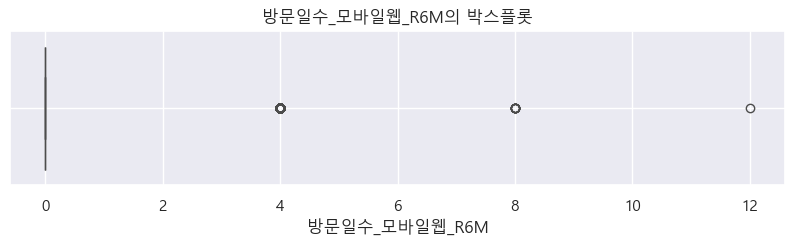

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문월수_모바일웹_R6M의 히스토그램


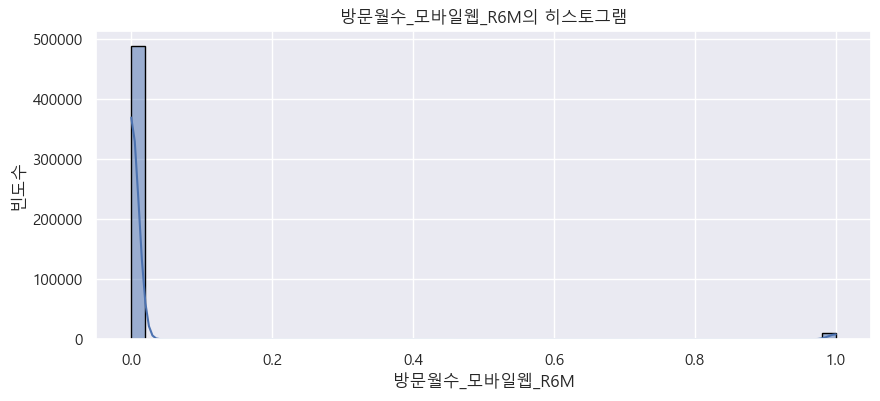

방문월수_모바일웹_R6M의 박스플롯


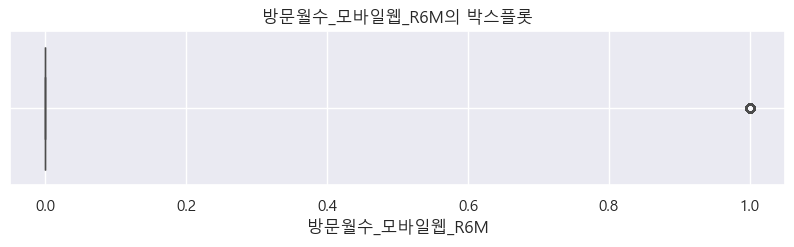

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문후경과월_모바일웹_R6M의 히스토그램


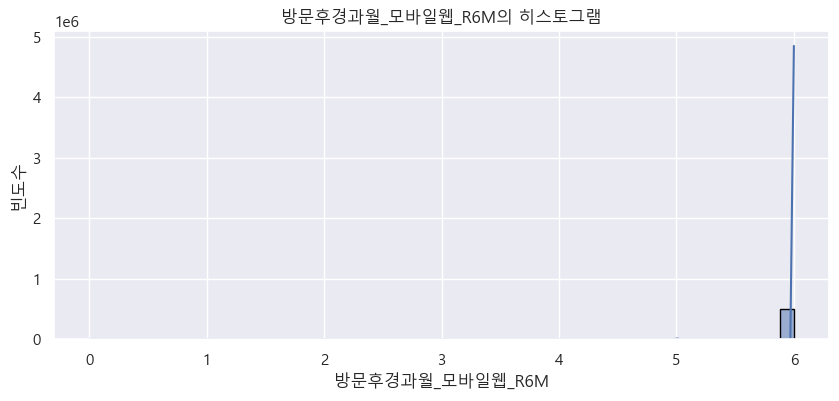

방문후경과월_모바일웹_R6M의 박스플롯


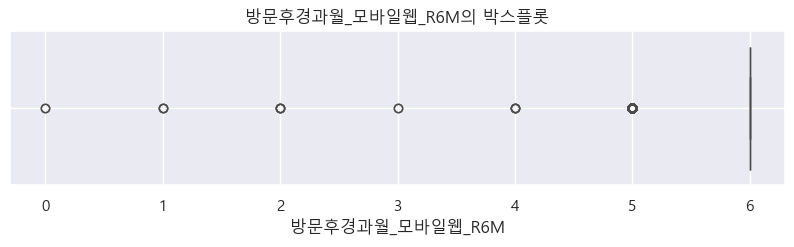

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문횟수_PC_B0M의 히스토그램


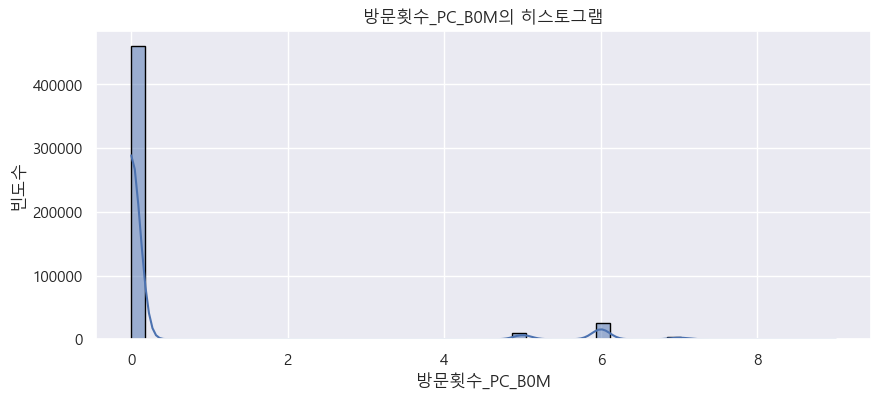

방문횟수_PC_B0M의 박스플롯


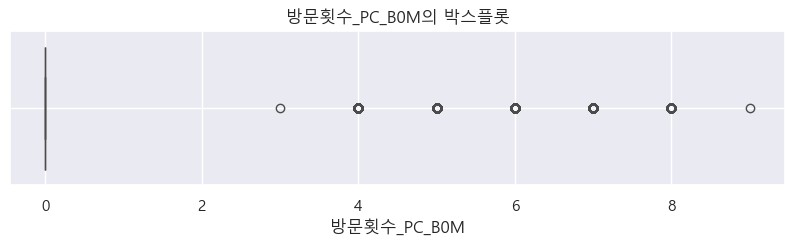

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문일수_PC_B0M의 히스토그램


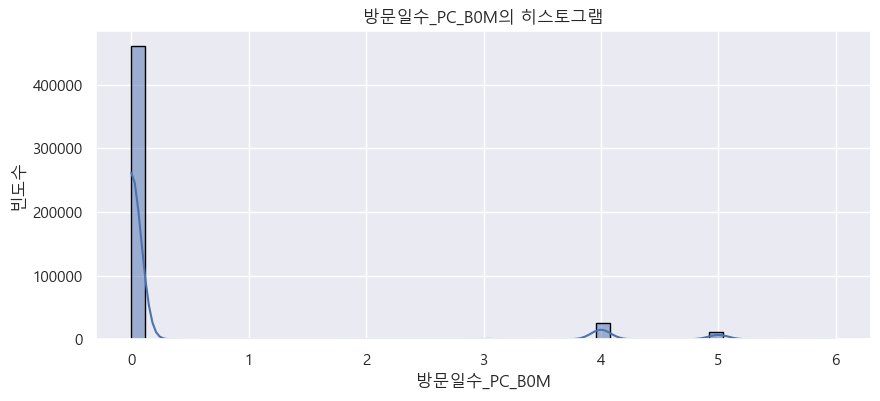

방문일수_PC_B0M의 박스플롯


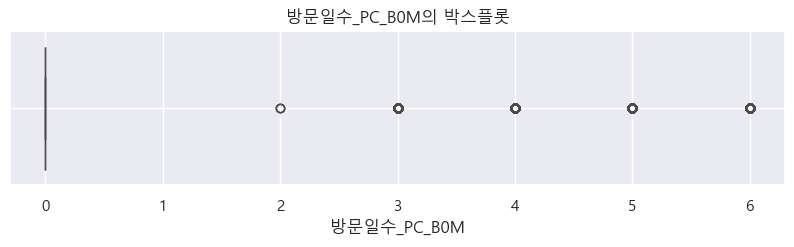

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문횟수_앱_B0M의 히스토그램


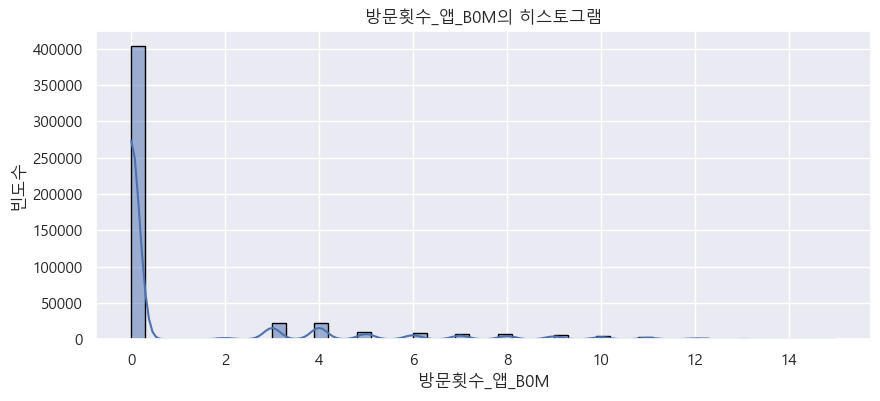

방문횟수_앱_B0M의 박스플롯


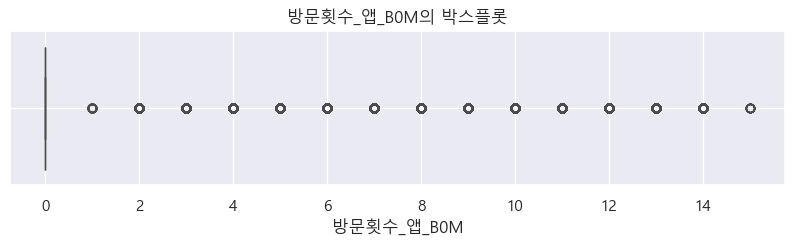

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문일수_앱_B0M의 히스토그램


방문일수_앱_B0M의 박스플롯


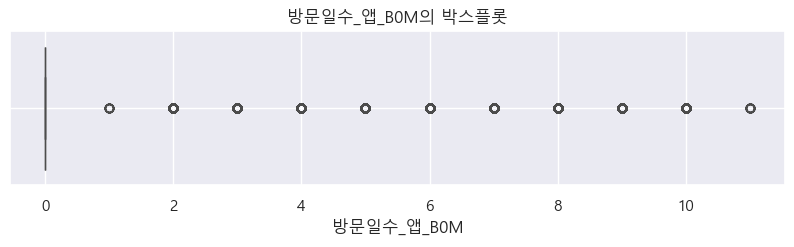

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문횟수_모바일웹_B0M의 히스토그램


방문횟수_모바일웹_B0M의 박스플롯


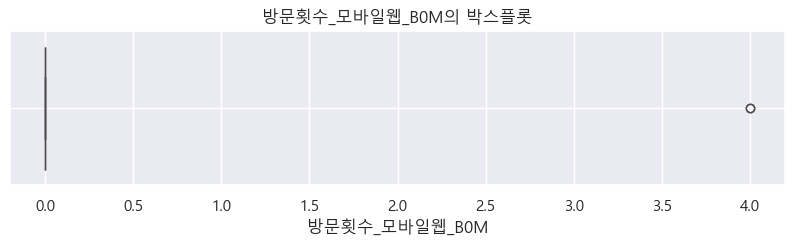

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

방문일수_모바일웹_B0M의 히스토그램


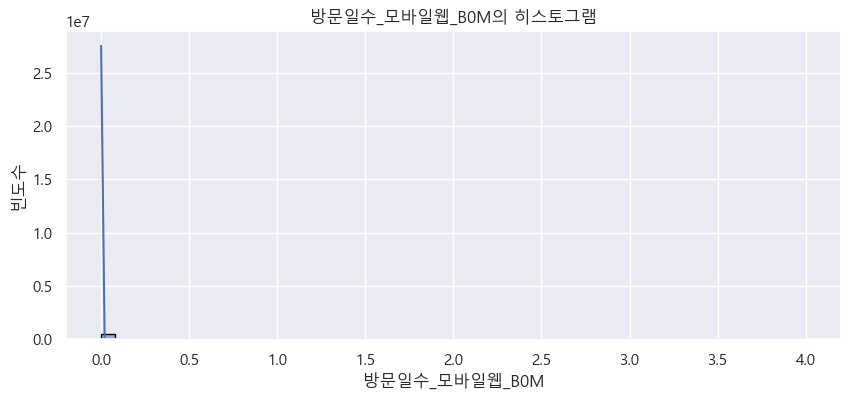

방문일수_모바일웹_B0M의 박스플롯


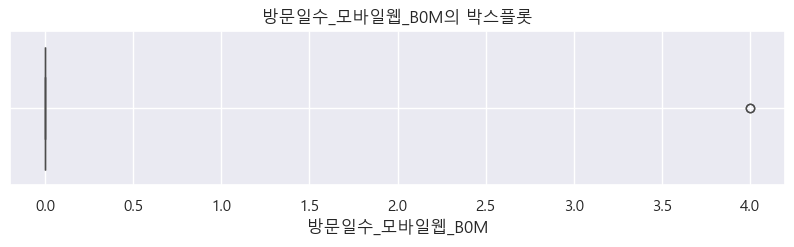

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입횟수_IB_R6M의 히스토그램


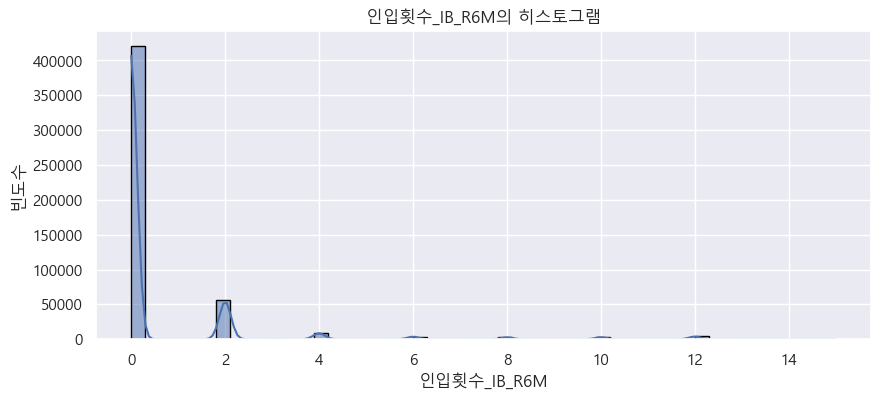

인입횟수_IB_R6M의 박스플롯


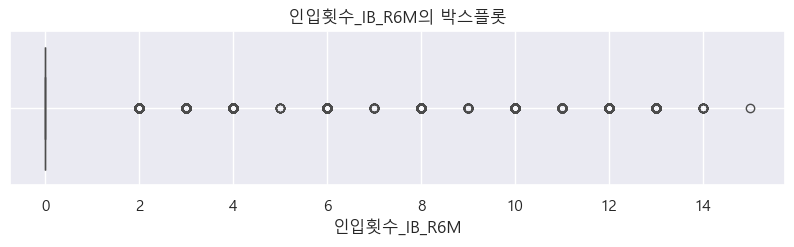

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입횟수_금융_IB_R6M의 히스토그램


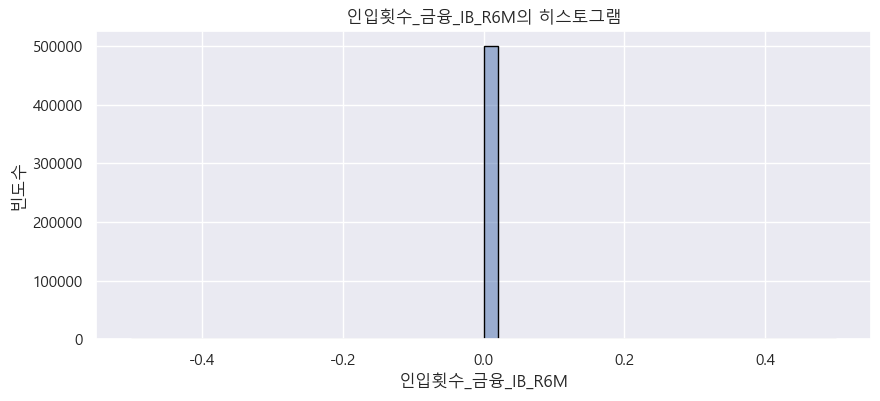

인입횟수_금융_IB_R6M의 박스플롯


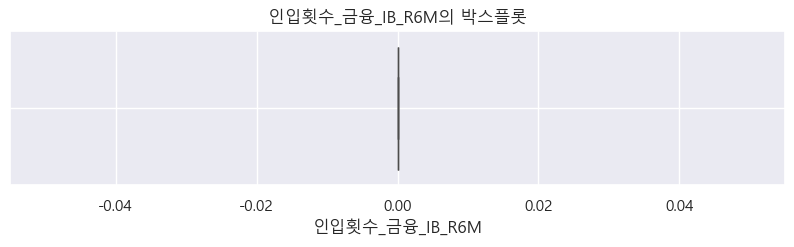

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입일수_IB_R6M의 히스토그램


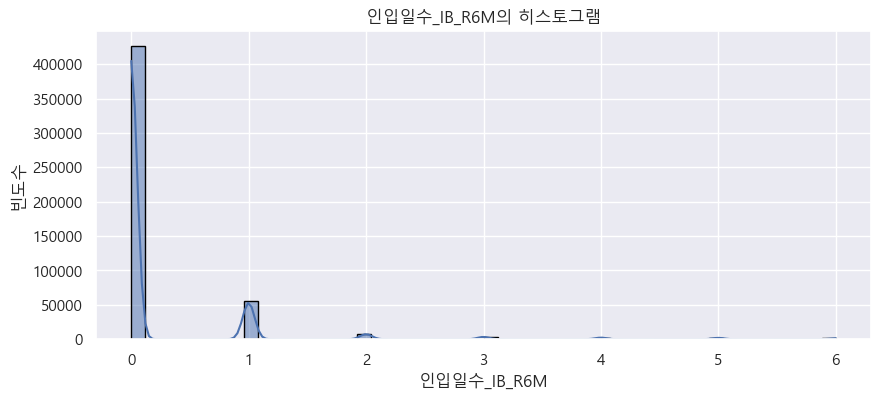

인입일수_IB_R6M의 박스플롯


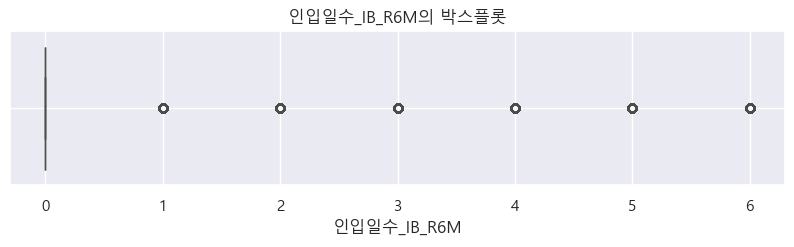

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입월수_IB_R6M의 히스토그램


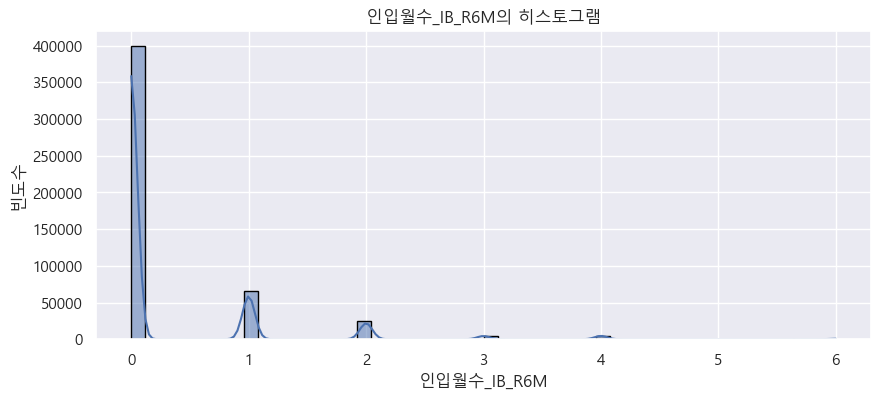

인입월수_IB_R6M의 박스플롯


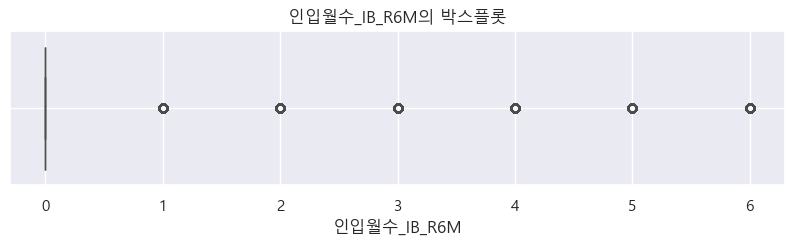

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

이용메뉴건수_IB_R6M의 히스토그램


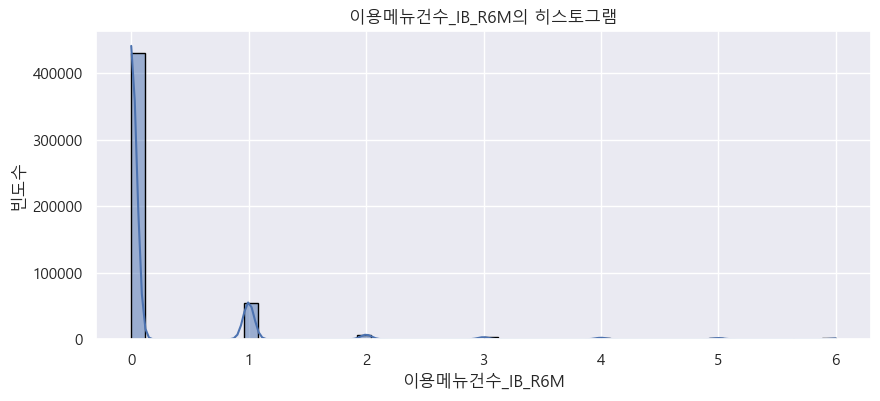

이용메뉴건수_IB_R6M의 박스플롯


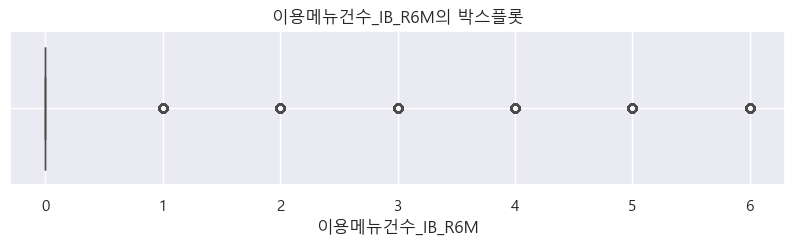

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입후경과월_IB_R6M의 히스토그램


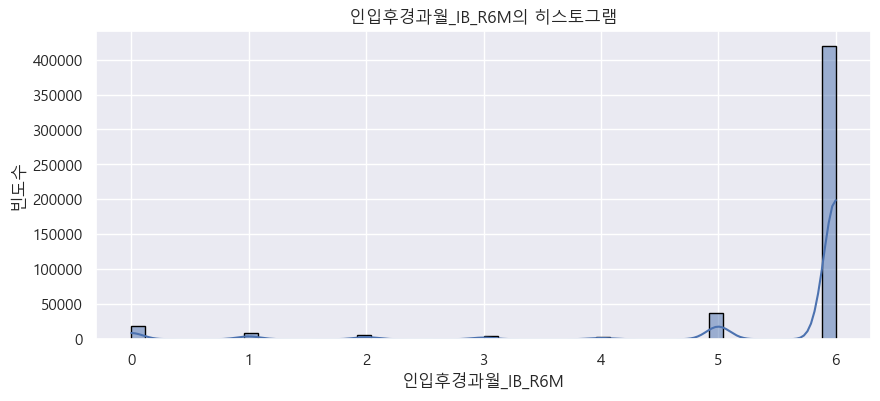

인입후경과월_IB_R6M의 박스플롯


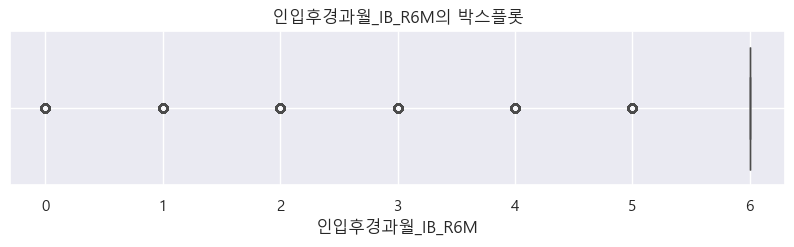

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입횟수_IB_B0M의 히스토그램


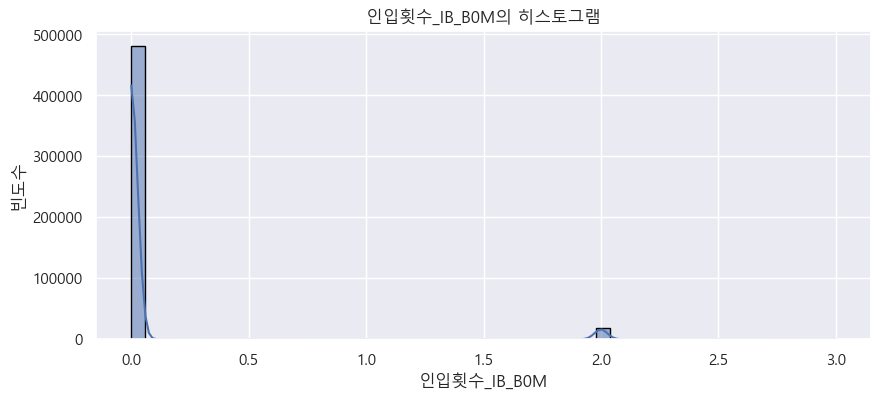

인입횟수_IB_B0M의 박스플롯


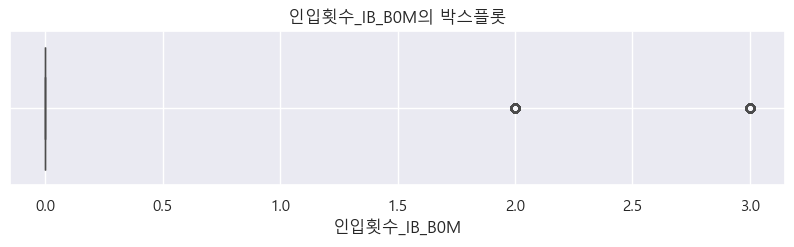

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입일수_IB_B0M의 히스토그램


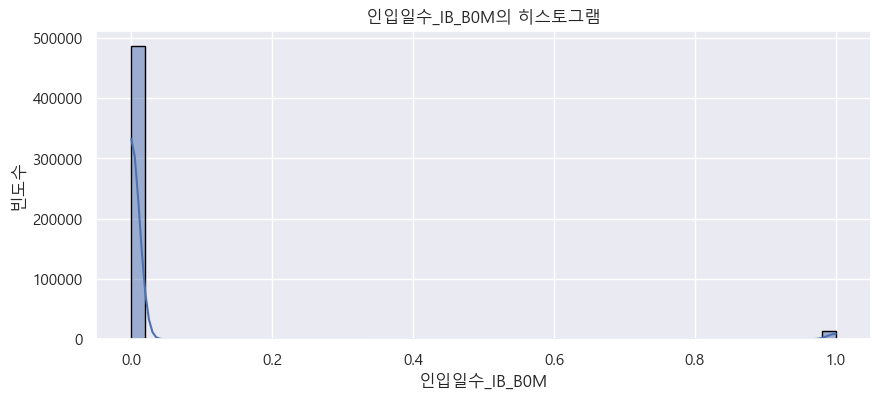

인입일수_IB_B0M의 박스플롯


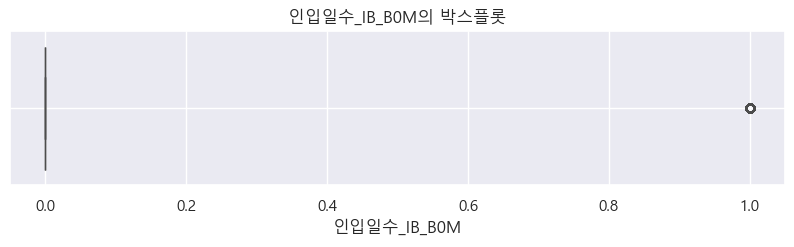

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

이용메뉴건수_IB_B0M의 히스토그램


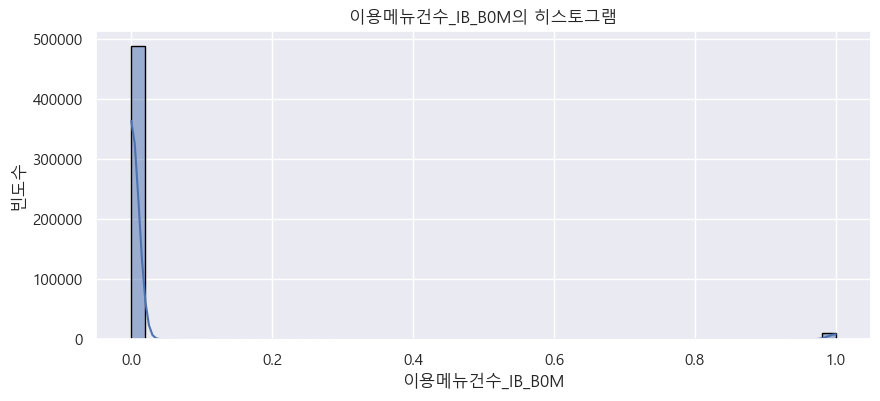

이용메뉴건수_IB_B0M의 박스플롯


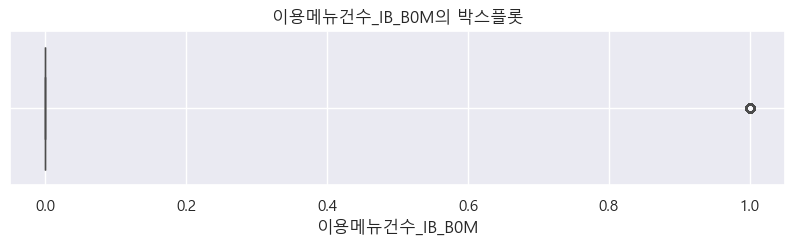

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입불만횟수_IB_R6M의 히스토그램


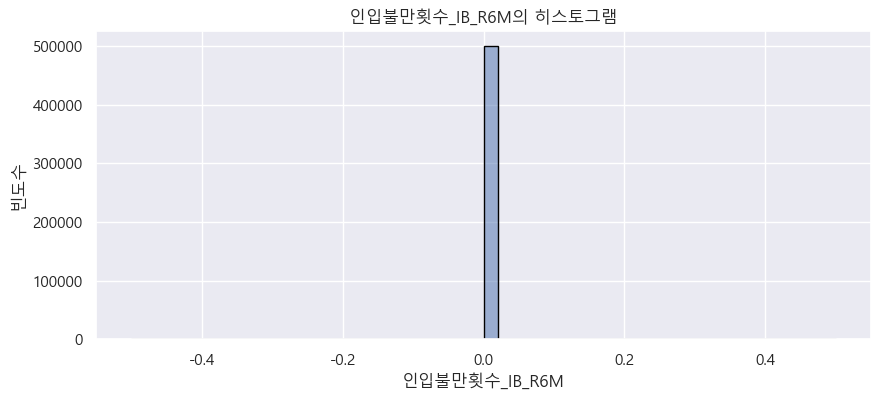

인입불만횟수_IB_R6M의 박스플롯


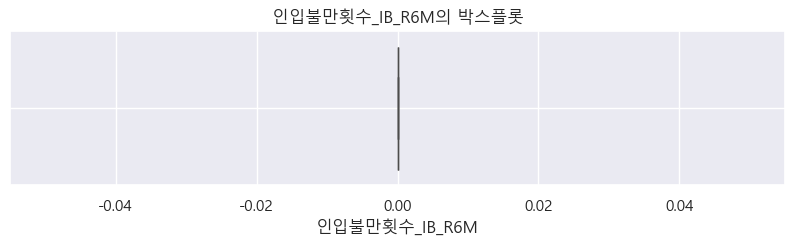

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입불만일수_IB_R6M의 히스토그램


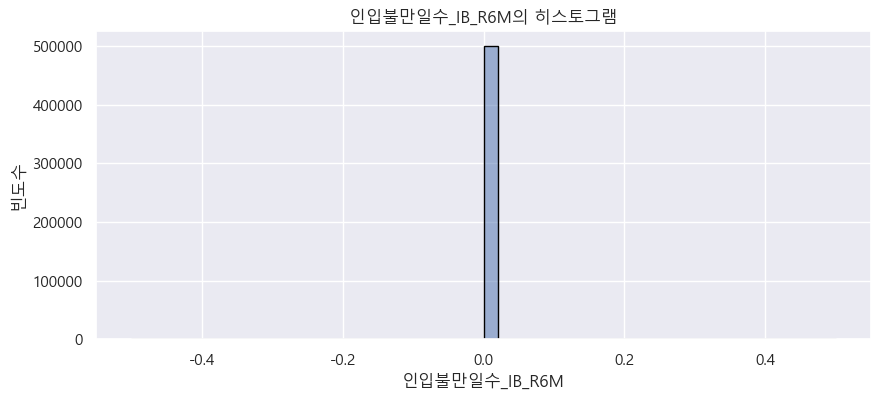

인입불만일수_IB_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입불만월수_IB_R6M의 히스토그램


인입불만월수_IB_R6M의 박스플롯


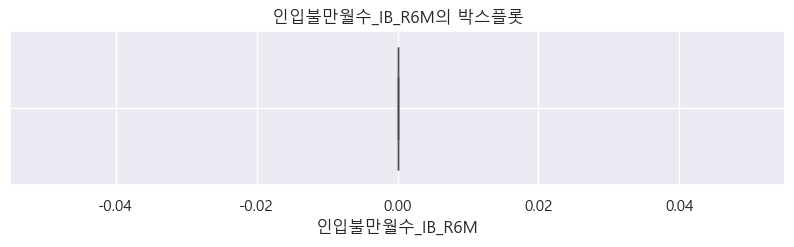

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입불만후경과월_IB_R6M의 히스토그램


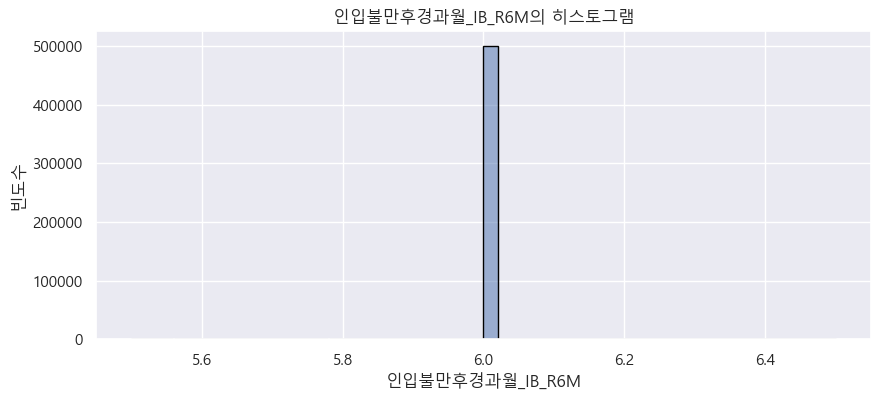

인입불만후경과월_IB_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입불만횟수_IB_B0M의 히스토그램


인입불만횟수_IB_B0M의 박스플롯


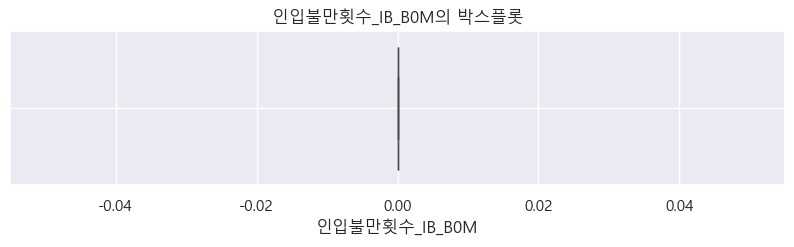

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

인입불만일수_IB_B0M의 히스토그램


인입불만일수_IB_B0M의 박스플롯


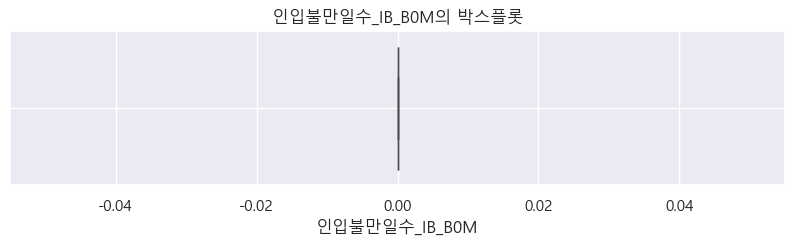

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

상담건수_B0M의 히스토그램


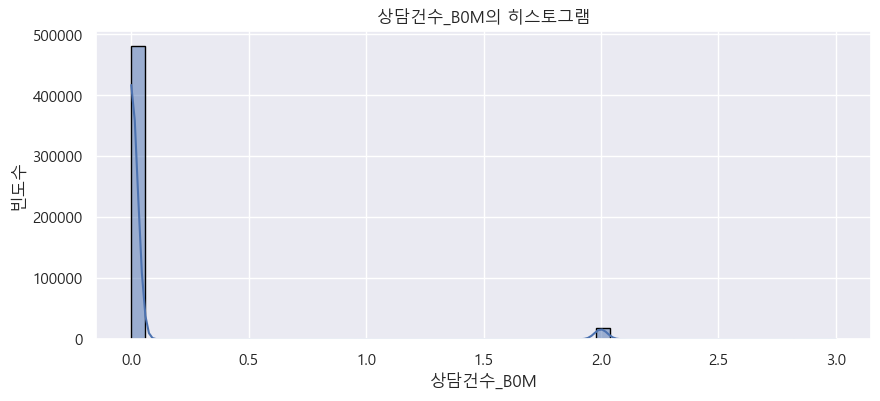

상담건수_B0M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_사용승인내역_B0M의 히스토그램


IB문의건수_사용승인내역_B0M의 박스플롯


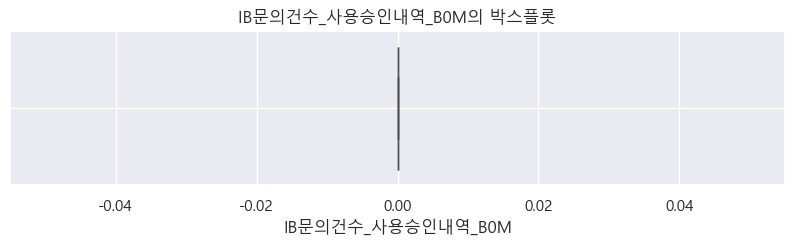

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_한도_B0M의 히스토그램


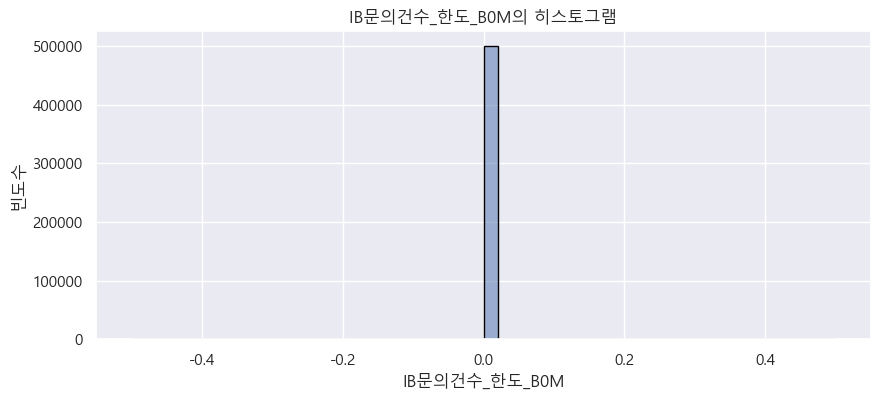

IB문의건수_한도_B0M의 박스플롯


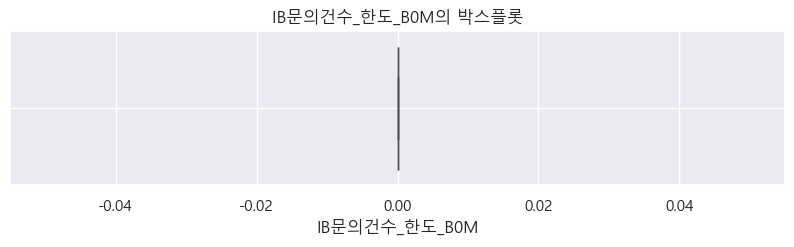

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_선결제_B0M의 히스토그램


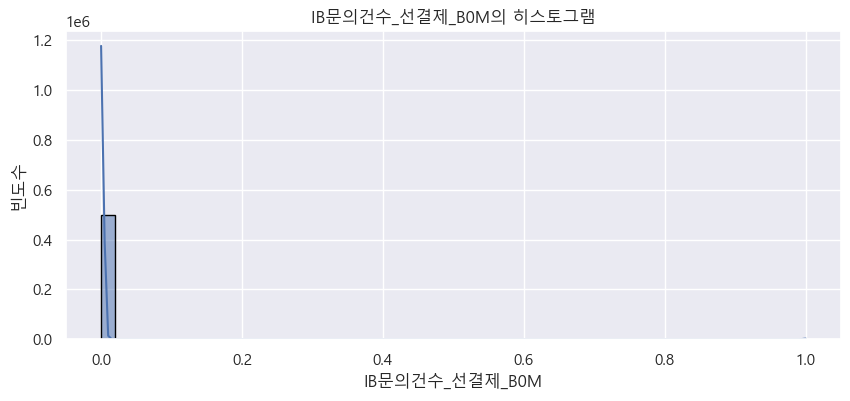

IB문의건수_선결제_B0M의 박스플롯


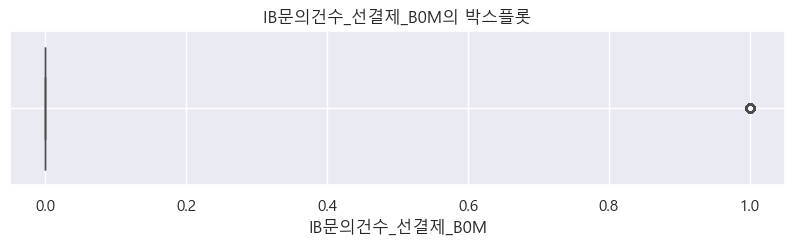

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_결제_B0M의 히스토그램


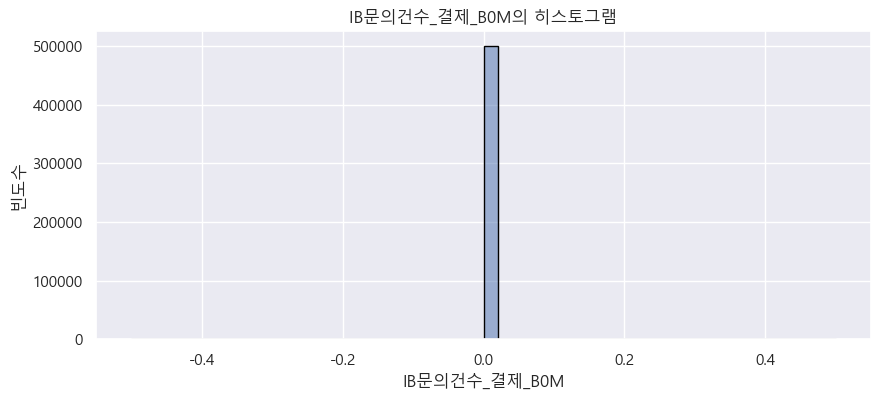

IB문의건수_결제_B0M의 박스플롯


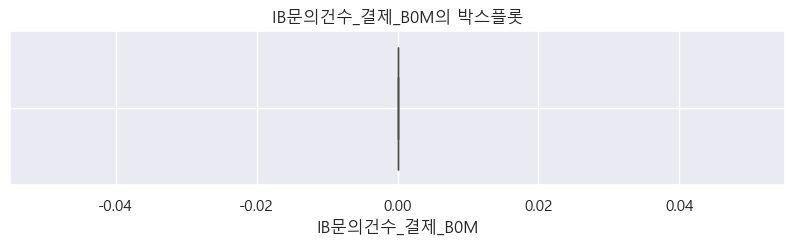

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_할부_B0M의 히스토그램


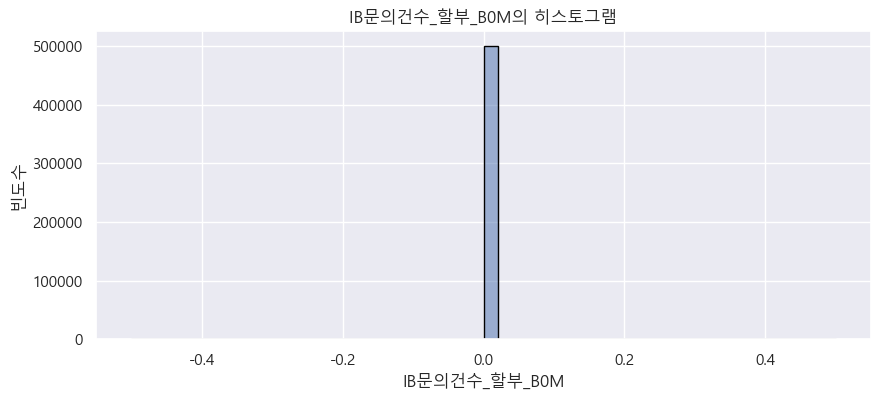

IB문의건수_할부_B0M의 박스플롯


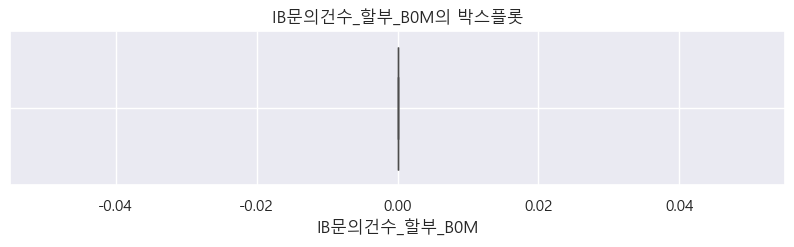

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_정보변경_B0M의 히스토그램


IB문의건수_정보변경_B0M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_결제일변경_B0M의 히스토그램


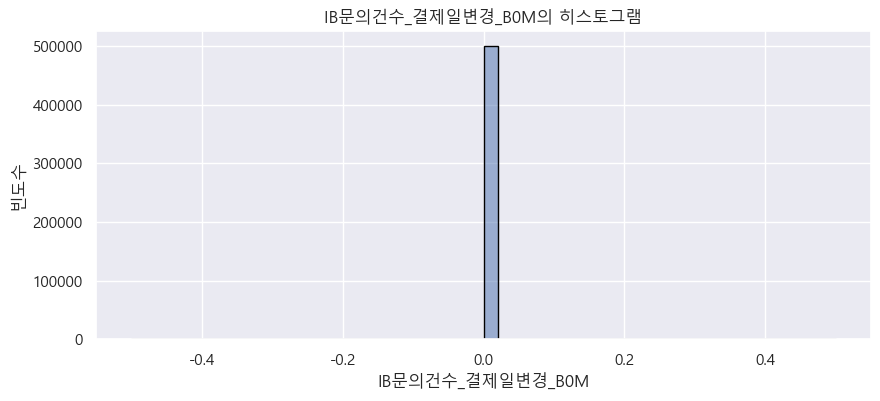

IB문의건수_결제일변경_B0M의 박스플롯


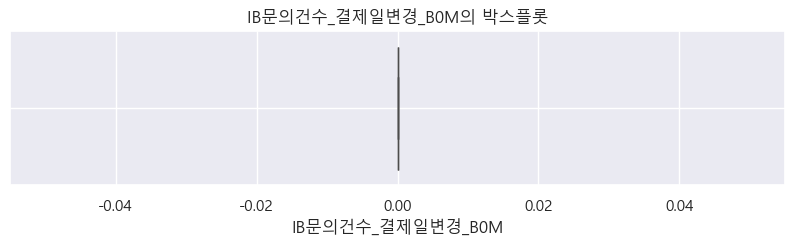

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_명세서_B0M의 히스토그램


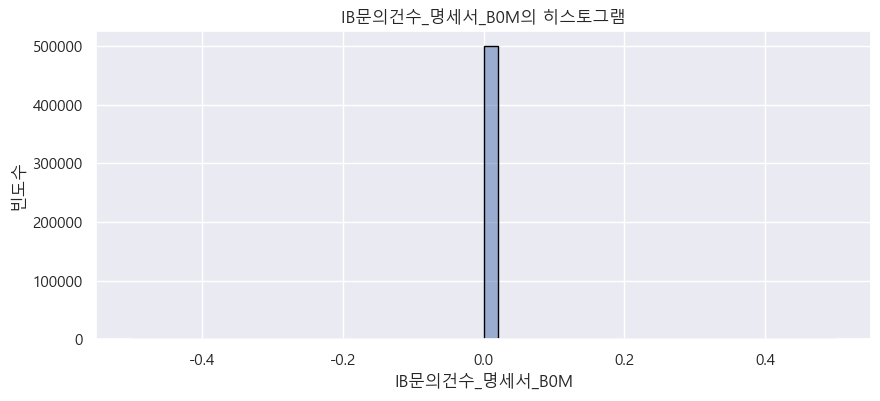

IB문의건수_명세서_B0M의 박스플롯


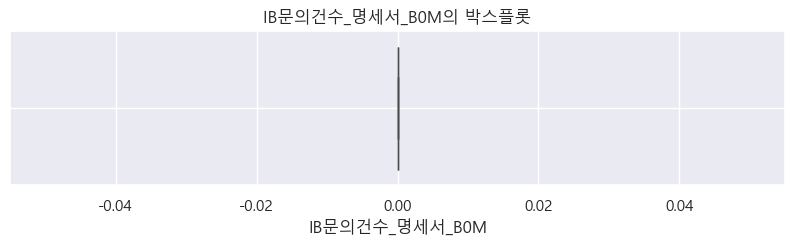

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_비밀번호_B0M의 히스토그램


IB문의건수_비밀번호_B0M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_SMS_B0M의 히스토그램


IB문의건수_SMS_B0M의 박스플롯


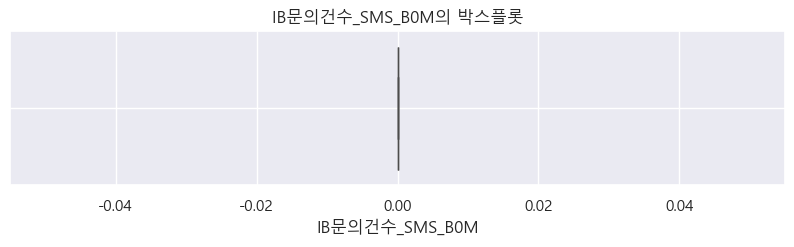

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_APP_B0M의 히스토그램


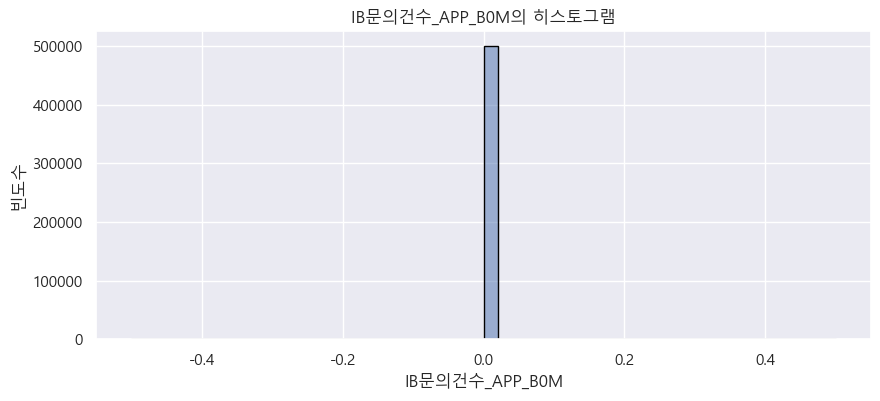

IB문의건수_APP_B0M의 박스플롯


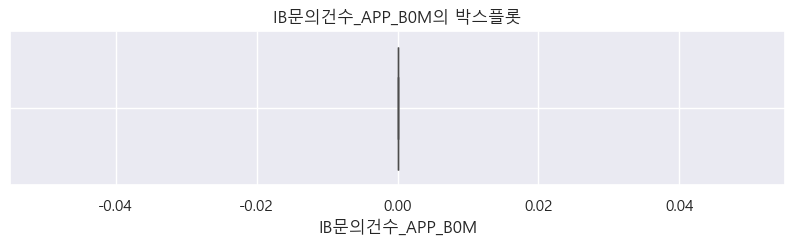

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_부대서비스_B0M의 히스토그램


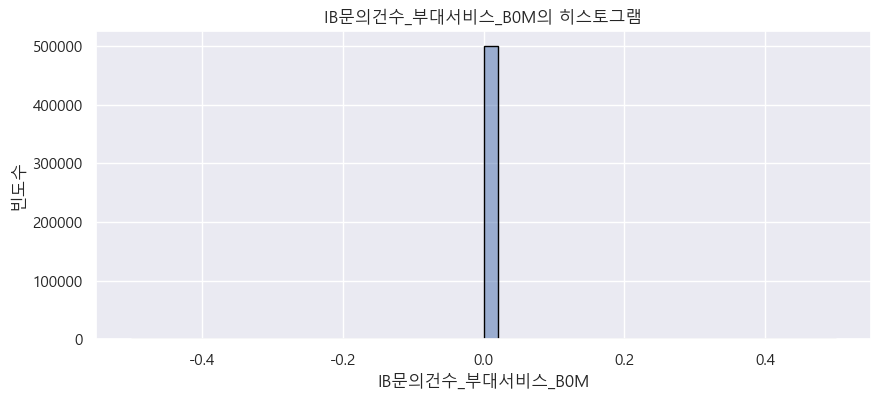

IB문의건수_부대서비스_B0M의 박스플롯


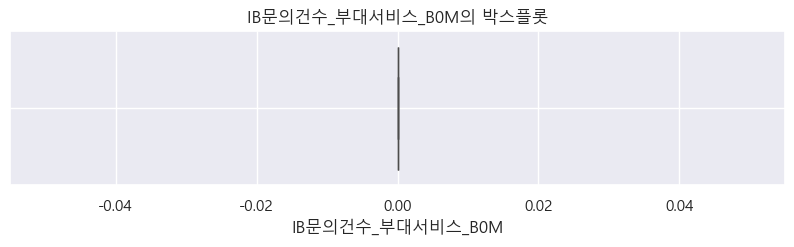

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_포인트_B0M의 히스토그램


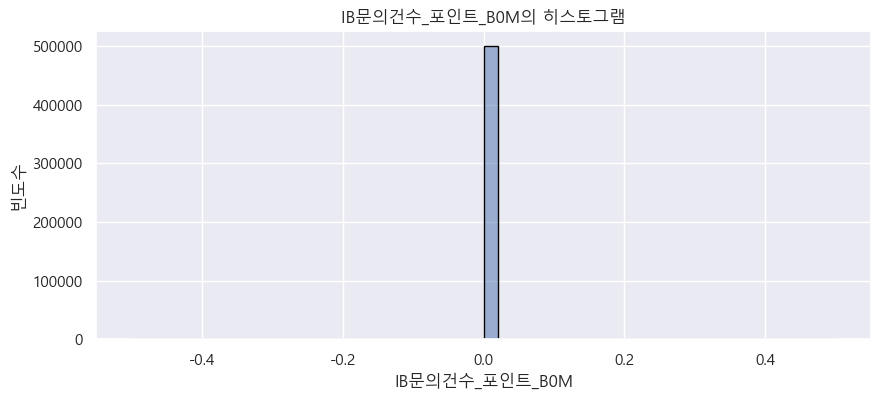

IB문의건수_포인트_B0M의 박스플롯


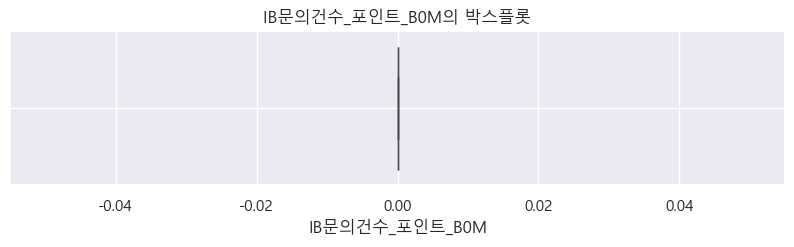

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_카드발급_B0M의 히스토그램


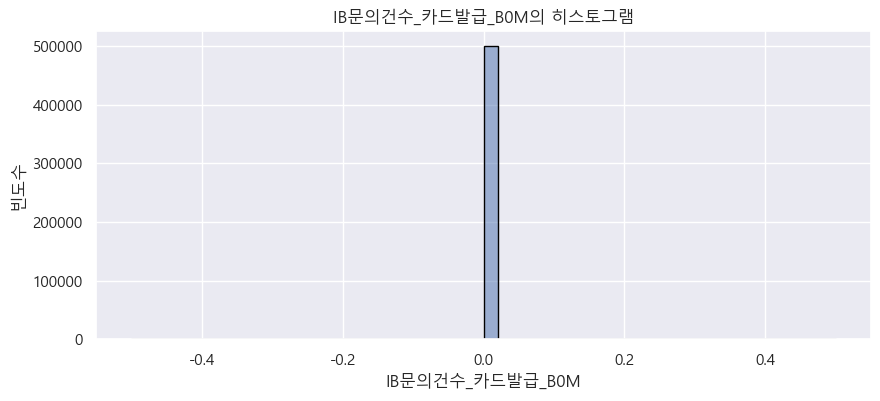

IB문의건수_카드발급_B0M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_BL_B0M의 히스토그램


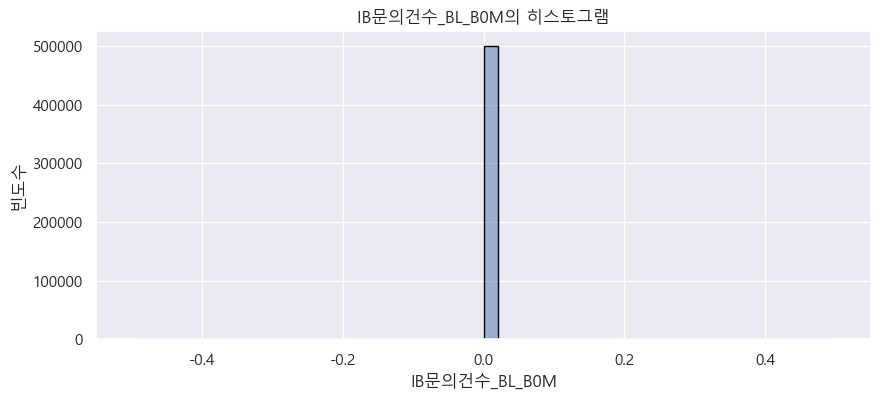

IB문의건수_BL_B0M의 박스플롯


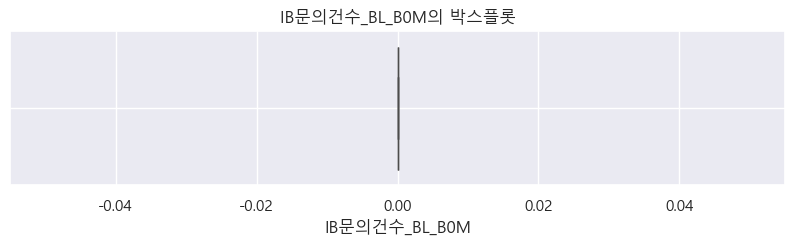

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_분실도난_B0M의 히스토그램


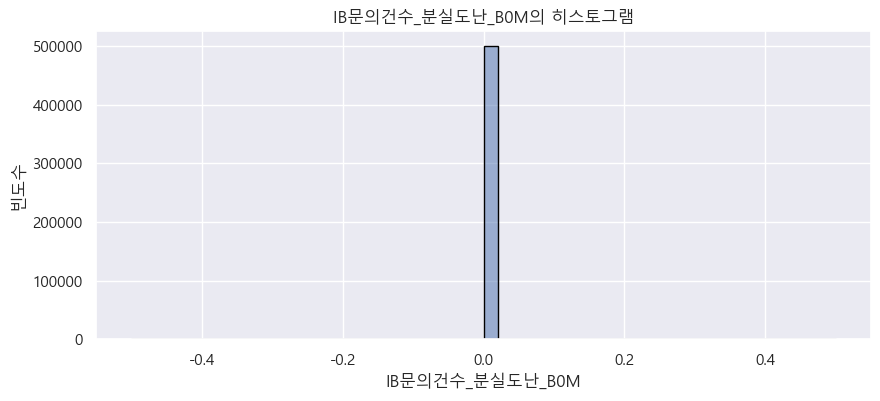

IB문의건수_분실도난_B0M의 박스플롯


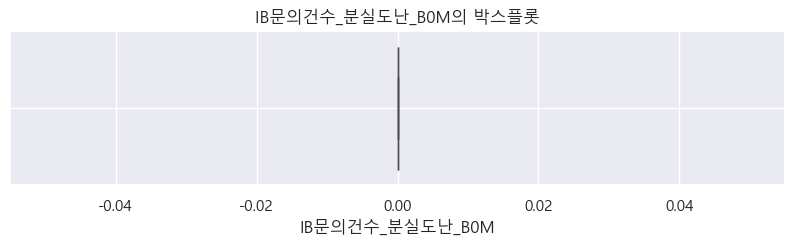

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_CA_B0M의 히스토그램


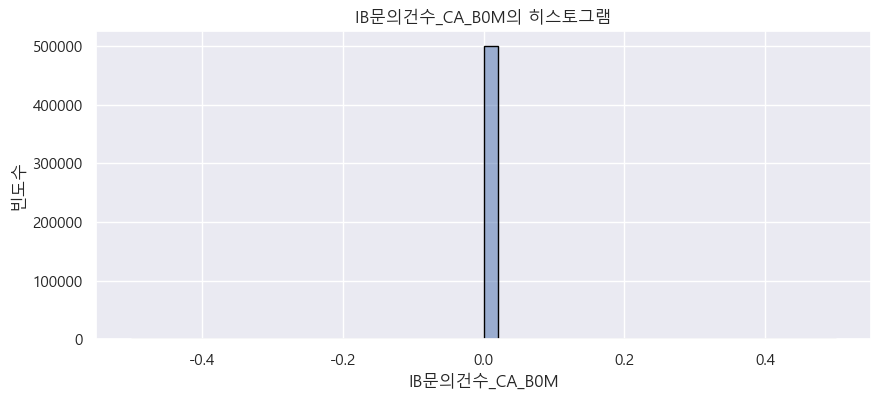

IB문의건수_CA_B0M의 박스플롯


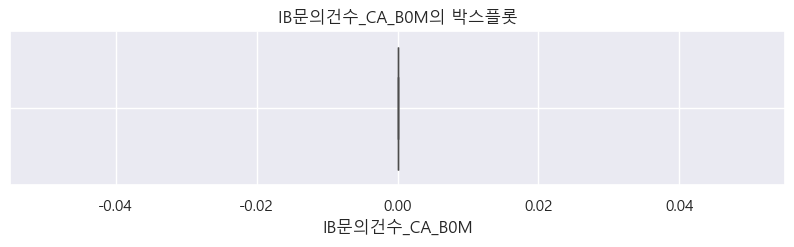

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_CL_RV_B0M의 히스토그램


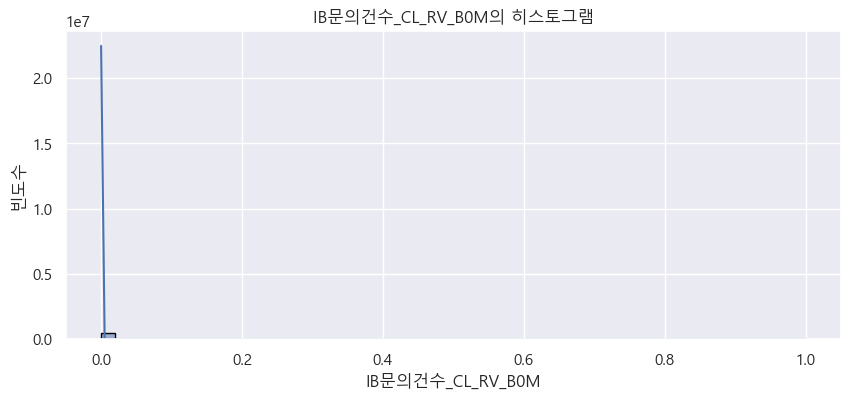

IB문의건수_CL_RV_B0M의 박스플롯


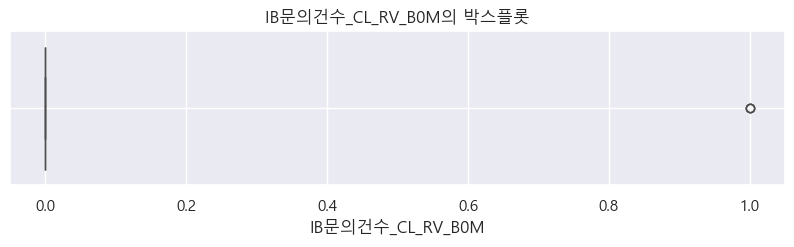

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_CS_B0M의 히스토그램


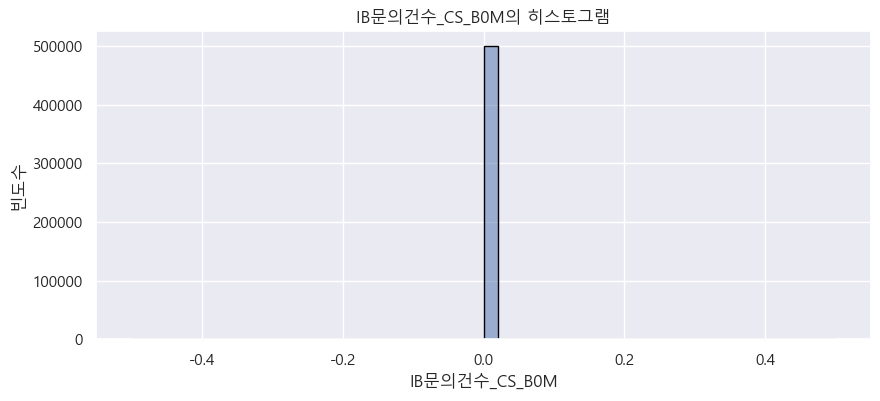

IB문의건수_CS_B0M의 박스플롯


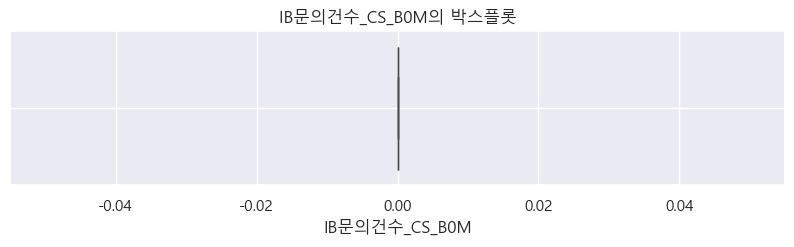

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_VOC_B0M의 히스토그램


IB상담건수_VOC_B0M의 박스플롯


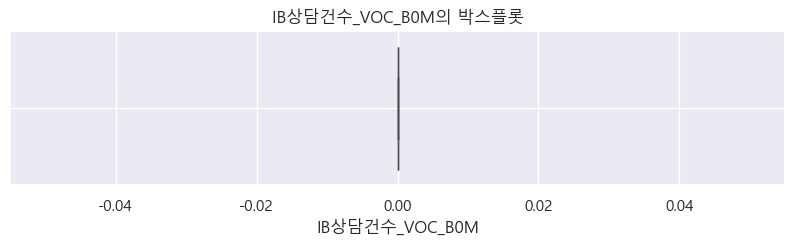

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_VOC민원_B0M의 히스토그램


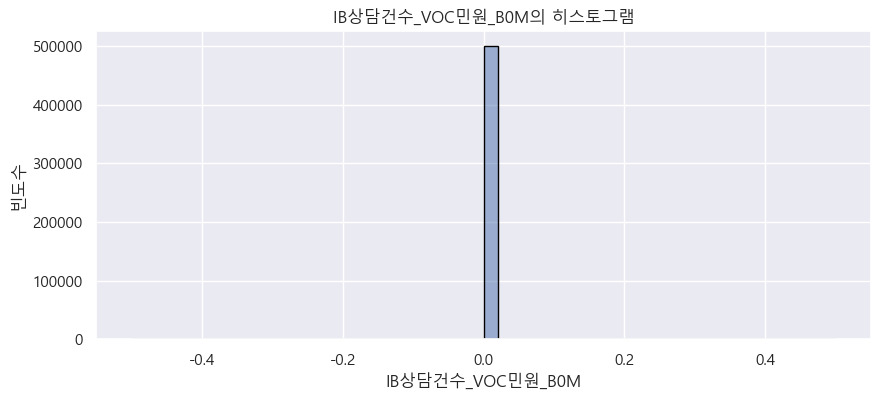

IB상담건수_VOC민원_B0M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_VOC불만_B0M의 히스토그램


IB상담건수_VOC불만_B0M의 박스플롯


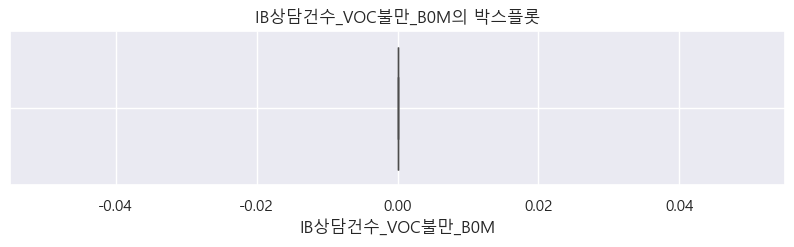

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_금감원_B0M의 히스토그램


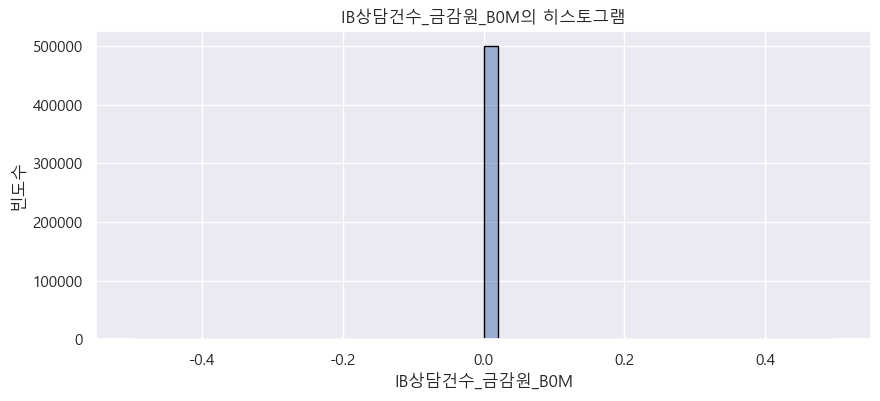

IB상담건수_금감원_B0M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

상담건수_R6M의 히스토그램


상담건수_R6M의 박스플롯


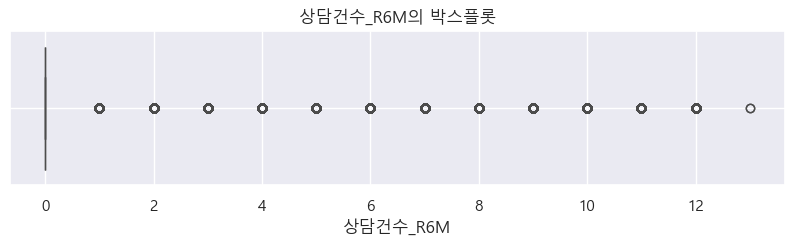

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_사용승인내역_R6M의 히스토그램


IB문의건수_사용승인내역_R6M의 박스플롯


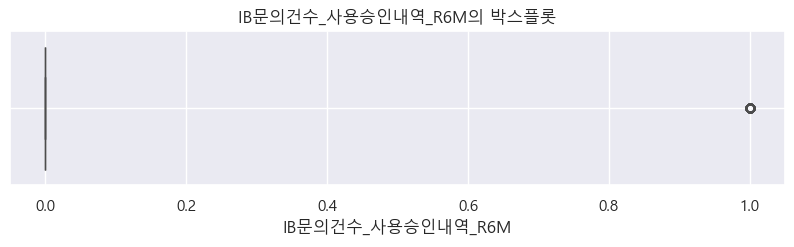

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_한도_R6M의 히스토그램


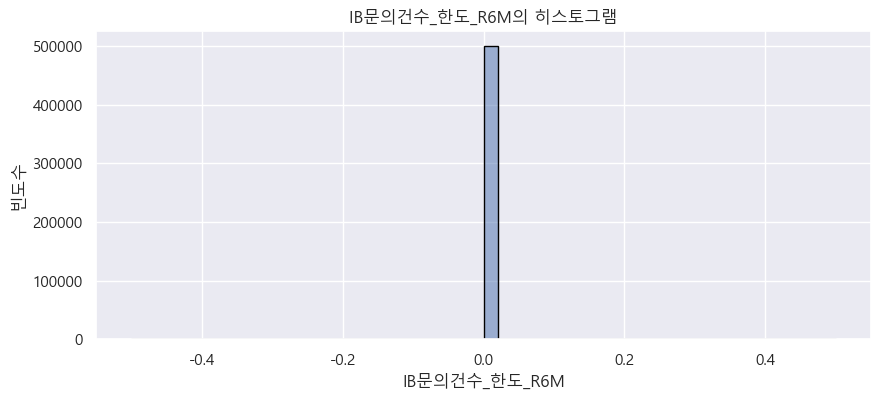

IB문의건수_한도_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_선결제_R6M의 히스토그램


IB문의건수_선결제_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_결제_R6M의 히스토그램


IB문의건수_결제_R6M의 박스플롯


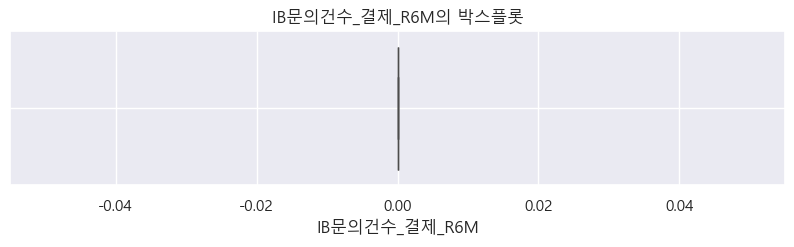

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_할부_R6M의 히스토그램


IB문의건수_할부_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_정보변경_R6M의 히스토그램


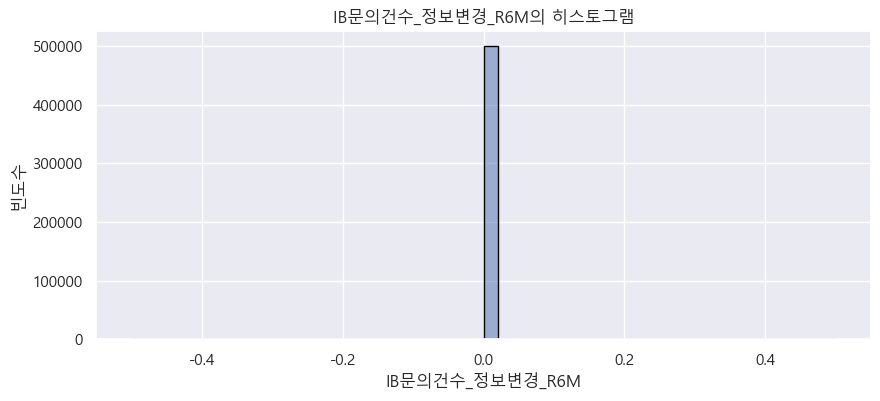

IB문의건수_정보변경_R6M의 박스플롯


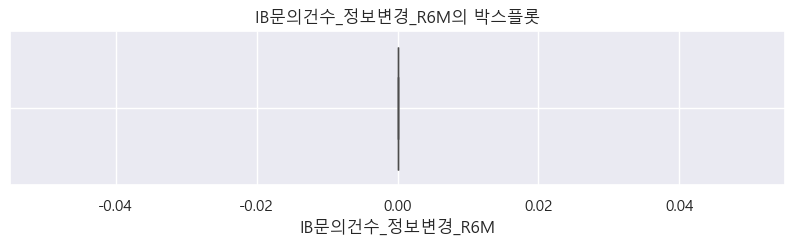

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_결제일변경_R6M의 히스토그램


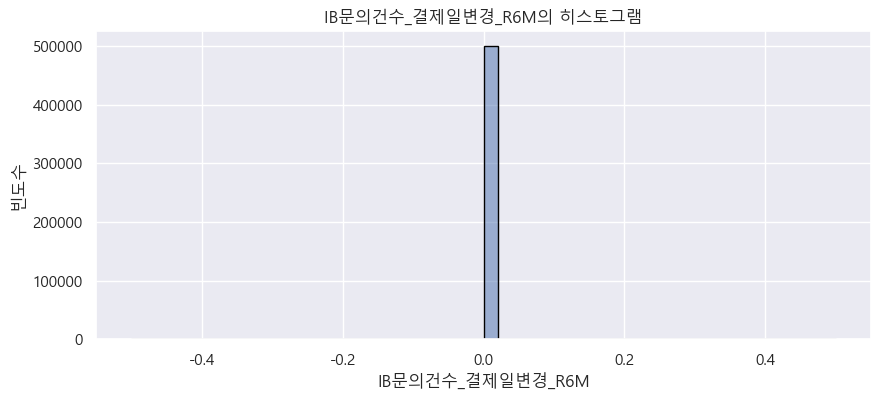

IB문의건수_결제일변경_R6M의 박스플롯


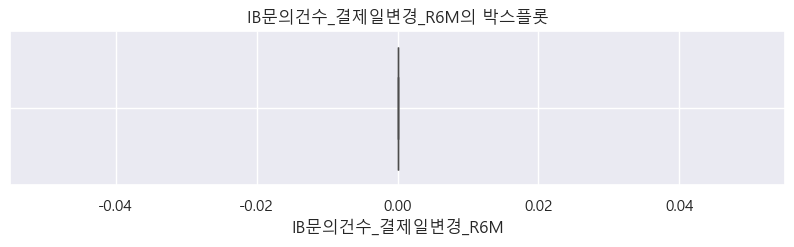

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_명세서_R6M의 히스토그램


IB문의건수_명세서_R6M의 박스플롯


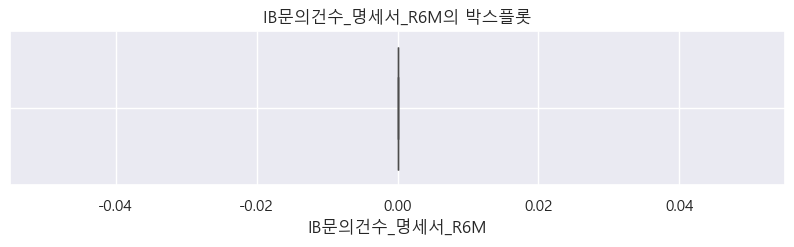

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_비밀번호_R6M의 히스토그램


IB문의건수_비밀번호_R6M의 박스플롯


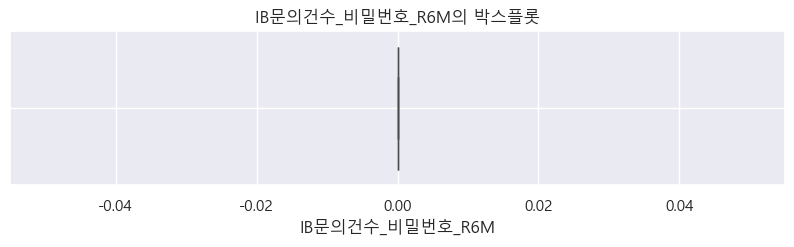

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_SMS_R6M의 히스토그램


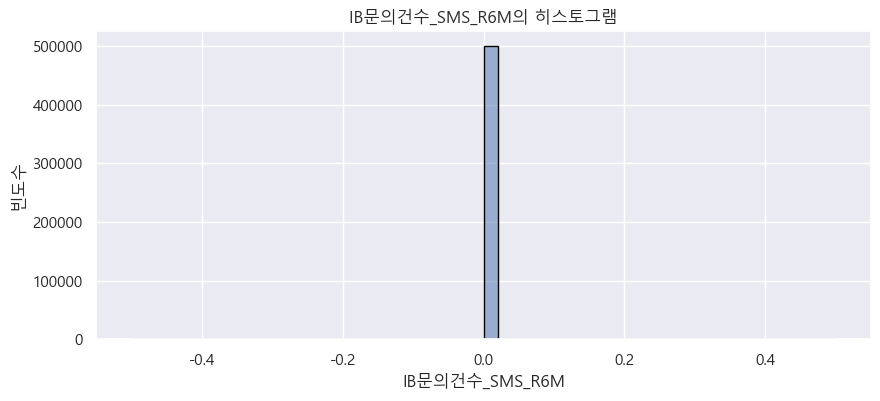

IB문의건수_SMS_R6M의 박스플롯


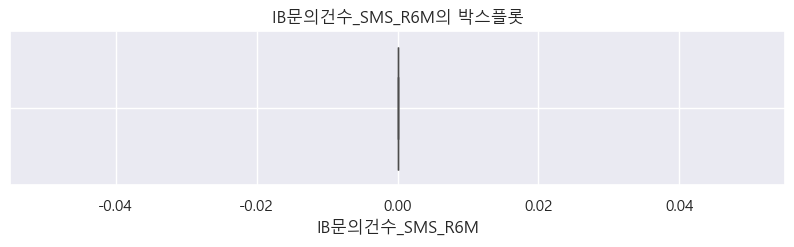

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_APP_R6M의 히스토그램


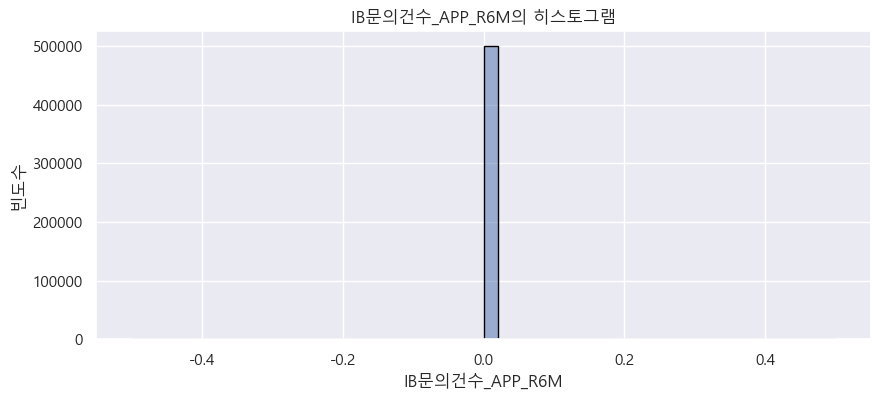

IB문의건수_APP_R6M의 박스플롯


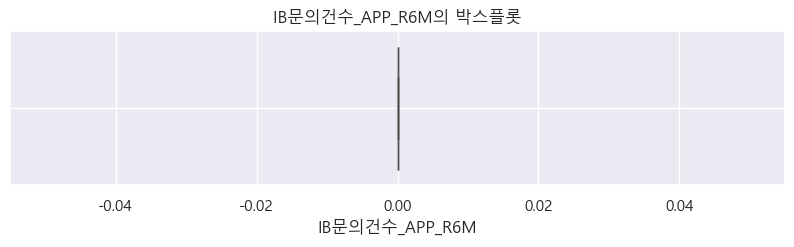

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_부대서비스_R6M의 히스토그램


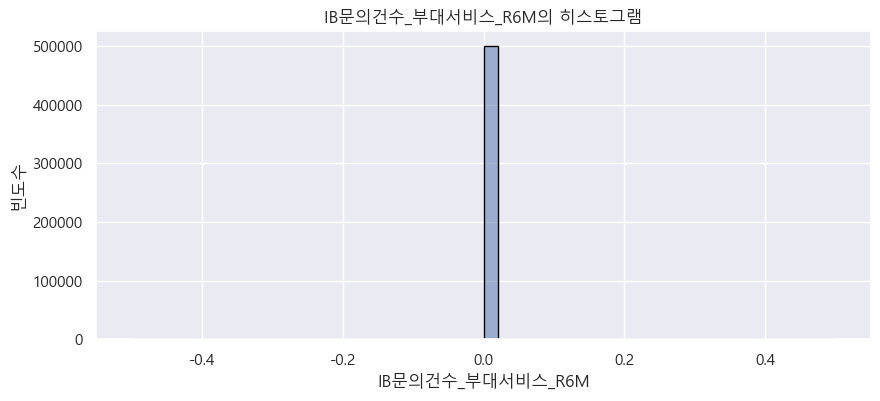

IB문의건수_부대서비스_R6M의 박스플롯


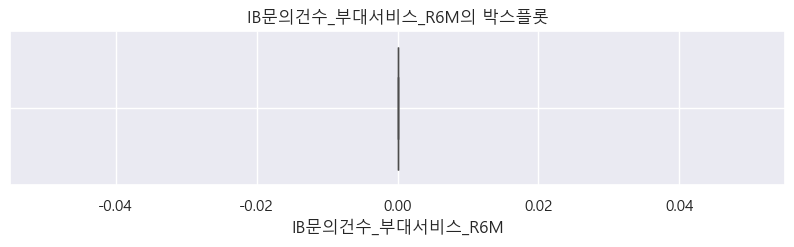

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_포인트_R6M의 히스토그램


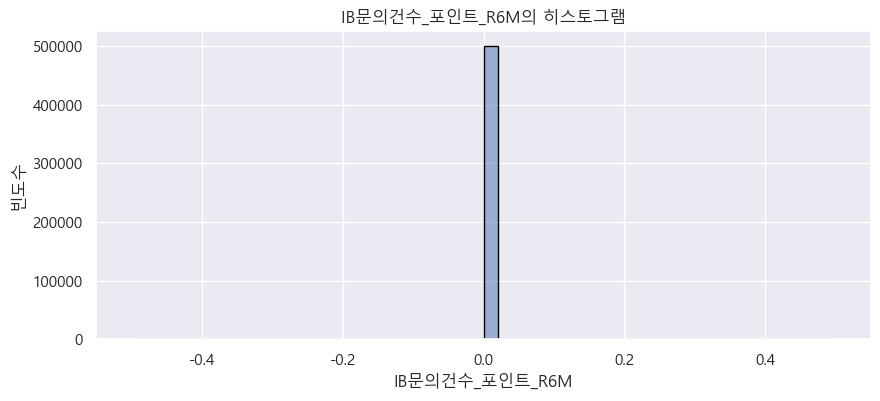

IB문의건수_포인트_R6M의 박스플롯


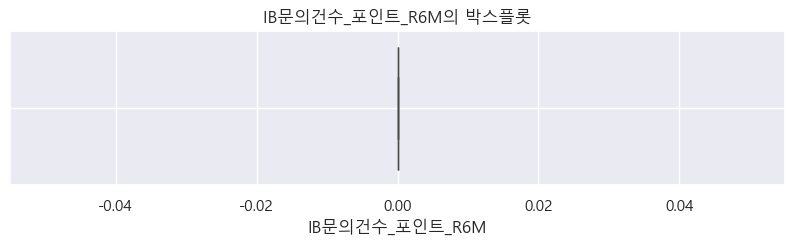

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_카드발급_R6M의 히스토그램


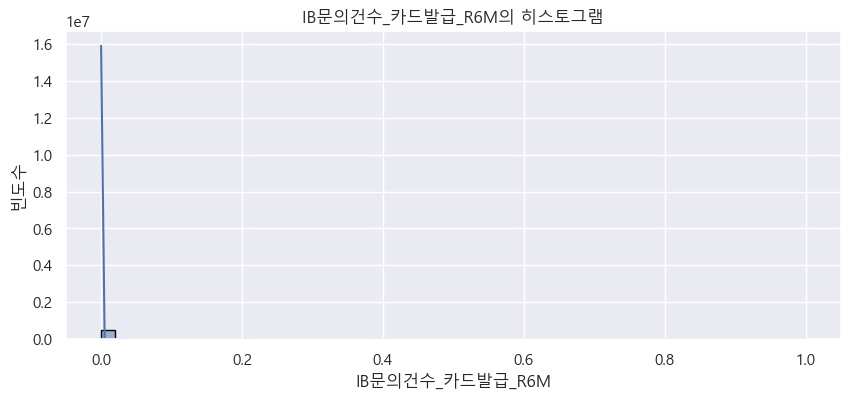

IB문의건수_카드발급_R6M의 박스플롯


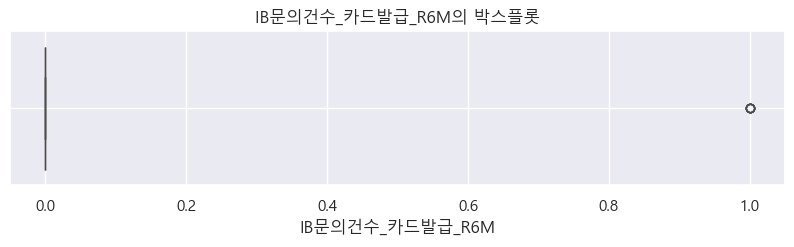

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_BL_R6M의 히스토그램


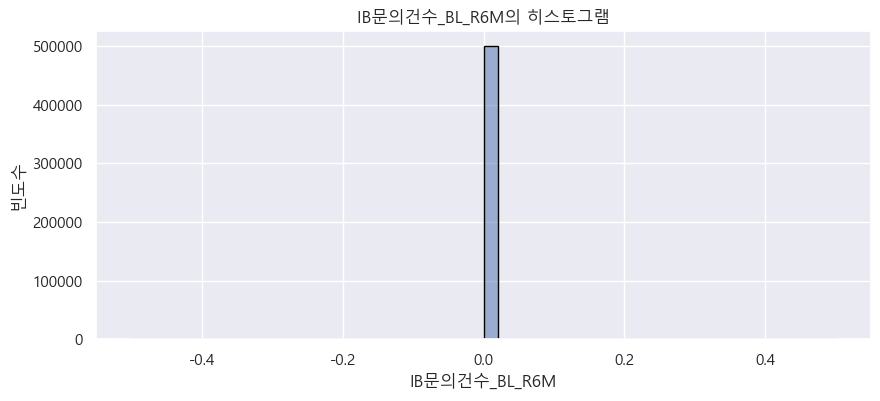

IB문의건수_BL_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_분실도난_R6M의 히스토그램


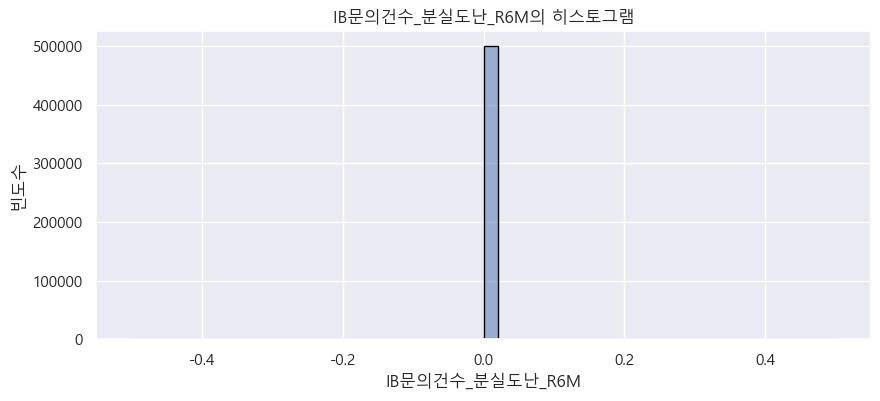

IB문의건수_분실도난_R6M의 박스플롯


─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_CA_R6M의 히스토그램


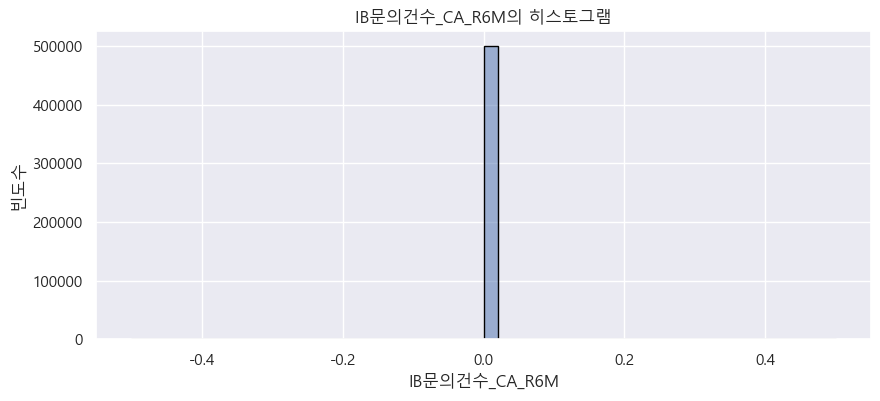

IB문의건수_CA_R6M의 박스플롯


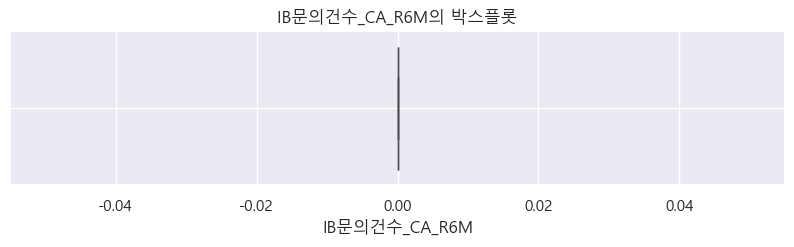

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_CL_RV_R6M의 히스토그램


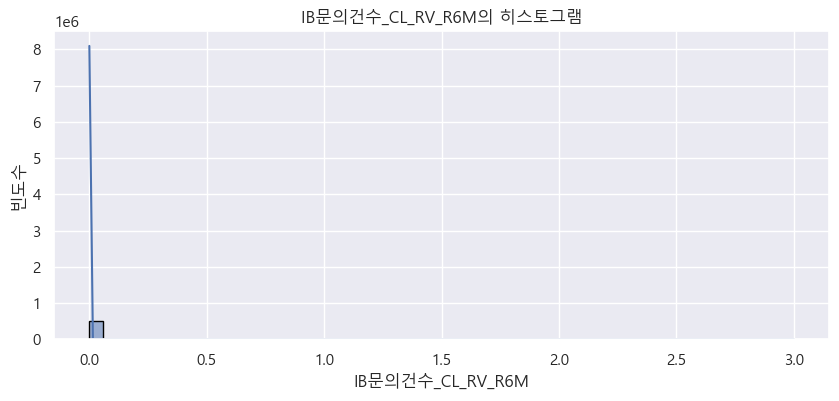

IB문의건수_CL_RV_R6M의 박스플롯


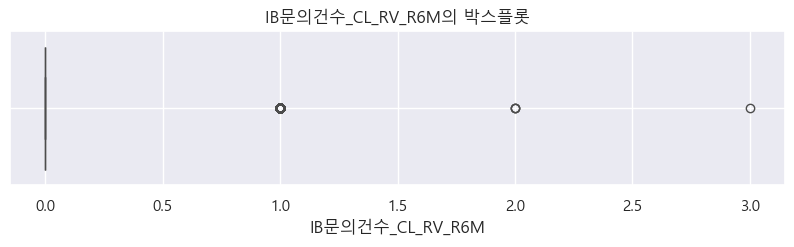

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB문의건수_CS_R6M의 히스토그램


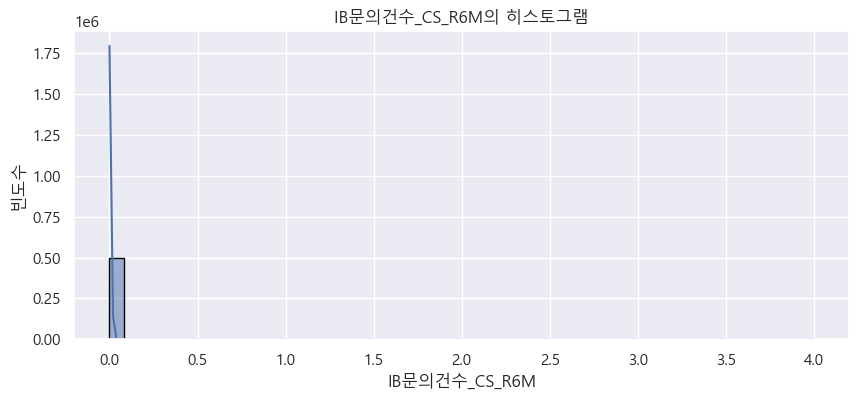

IB문의건수_CS_R6M의 박스플롯


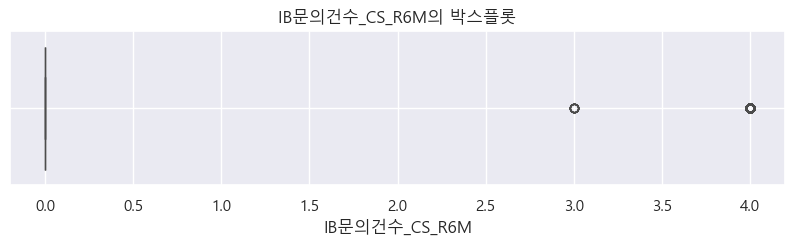

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_VOC_R6M의 히스토그램


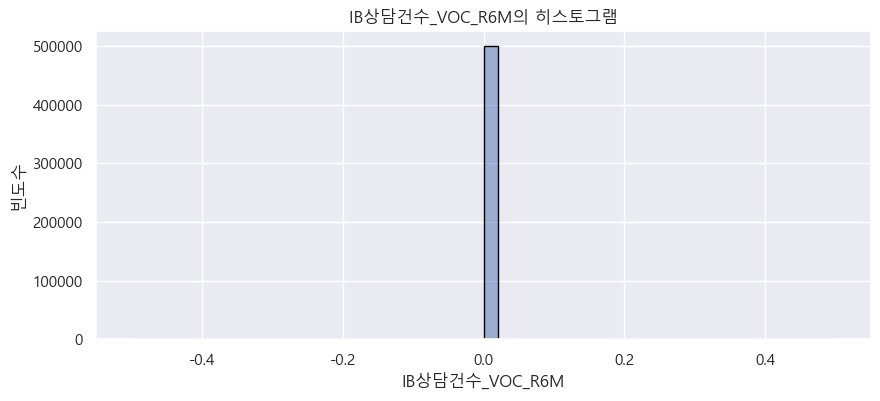

IB상담건수_VOC_R6M의 박스플롯


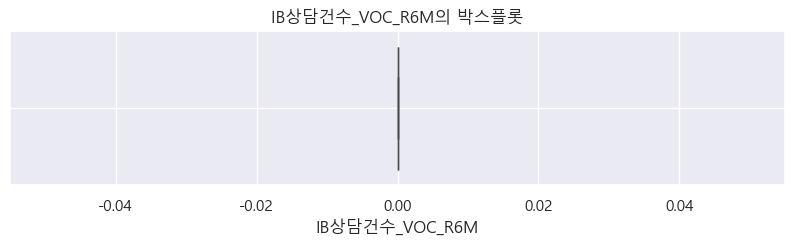

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_VOC민원_R6M의 히스토그램


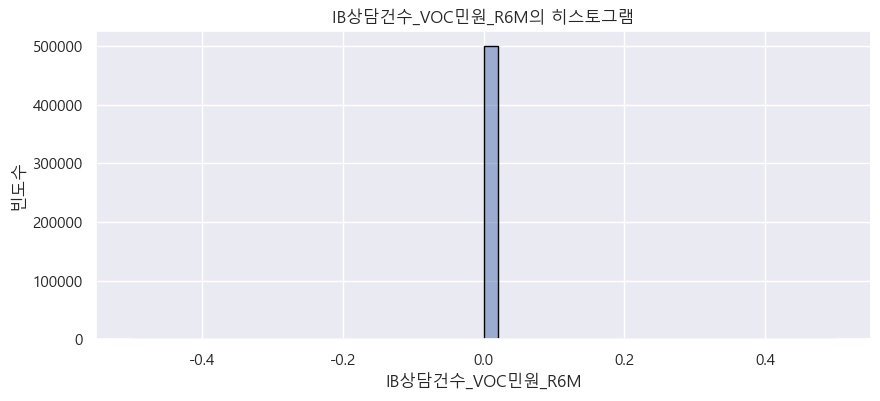

IB상담건수_VOC민원_R6M의 박스플롯


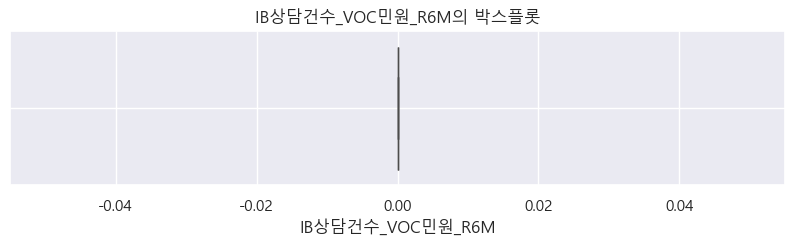

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_VOC불만_R6M의 히스토그램


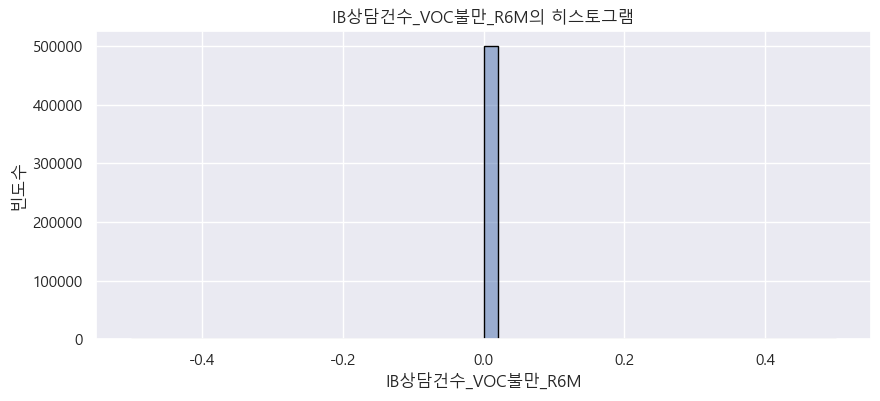

IB상담건수_VOC불만_R6M의 박스플롯


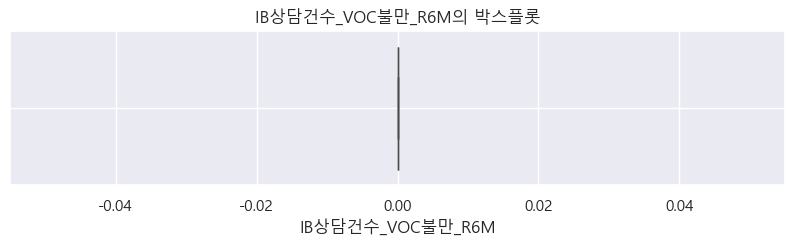

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

IB상담건수_금감원_R6M의 히스토그램


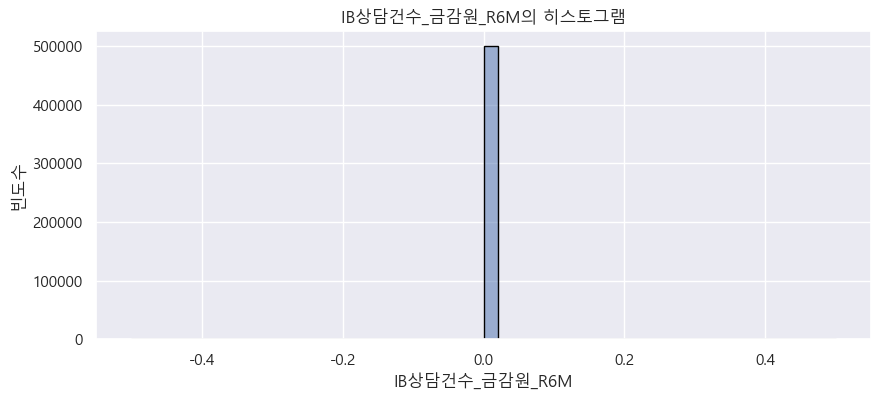

IB상담건수_금감원_R6M의 박스플롯


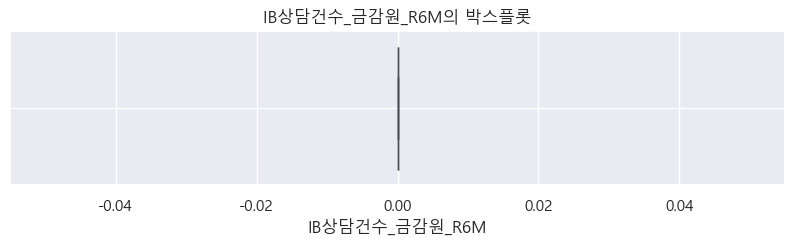

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

불만제기건수_B0M의 히스토그램


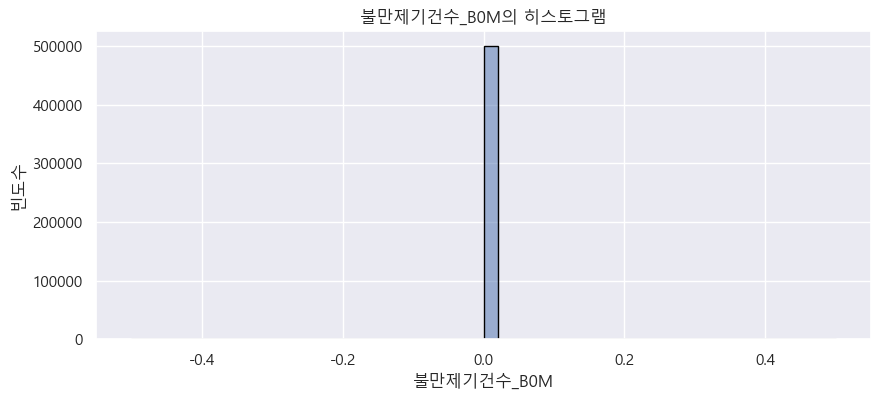

불만제기건수_B0M의 박스플롯


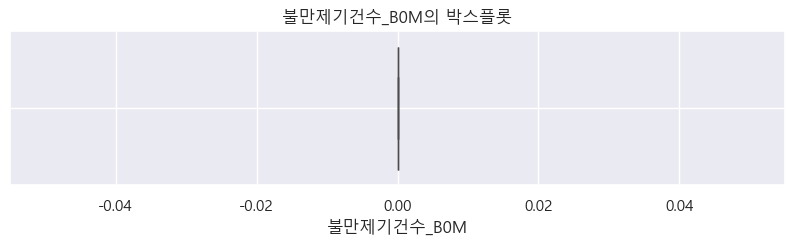

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

불만제기건수_R12M의 히스토그램


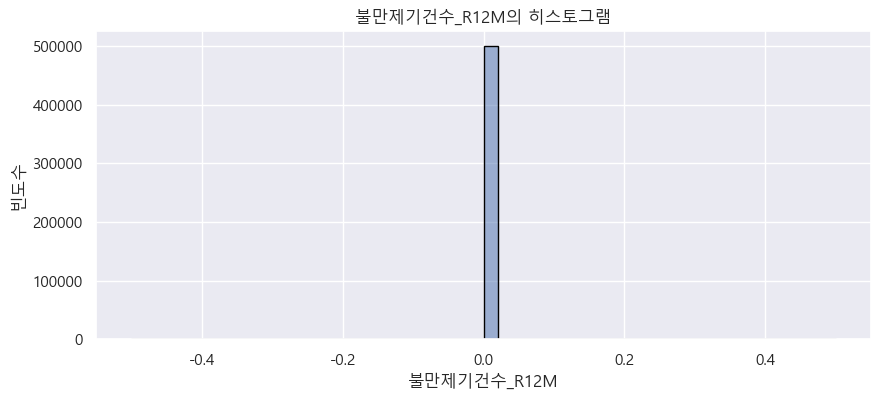

불만제기건수_R12M의 박스플롯


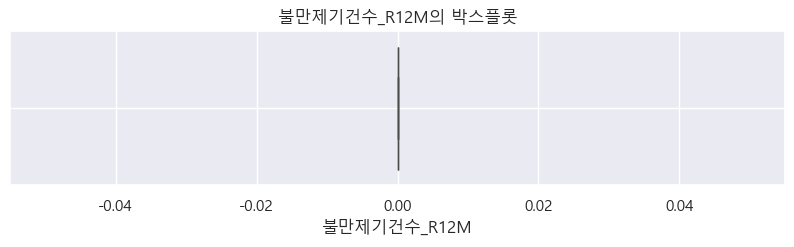

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

불만제기후경과월_R12M의 히스토그램


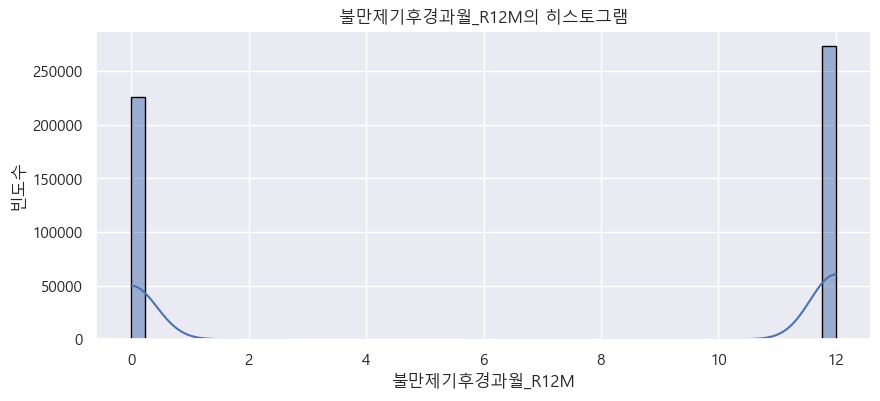

불만제기후경과월_R12M의 박스플롯


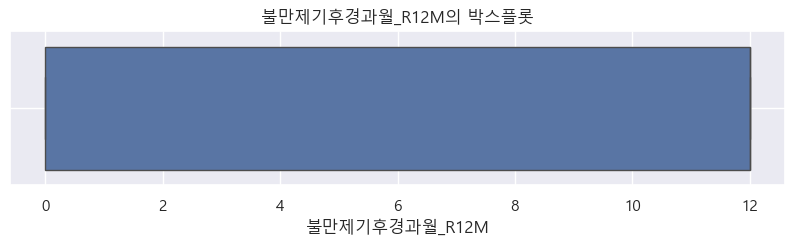

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

당사PAY_방문횟수_B0M의 히스토그램


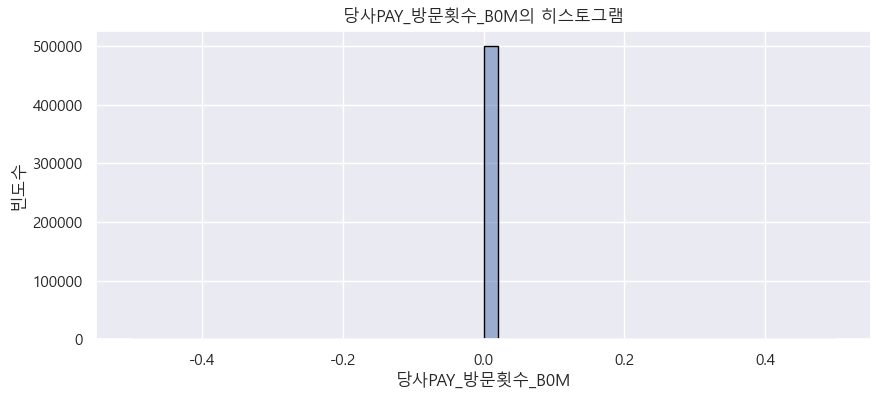

당사PAY_방문횟수_B0M의 박스플롯


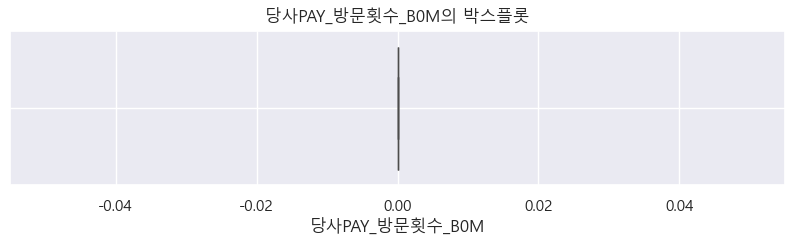

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

당사PAY_방문횟수_R6M의 히스토그램


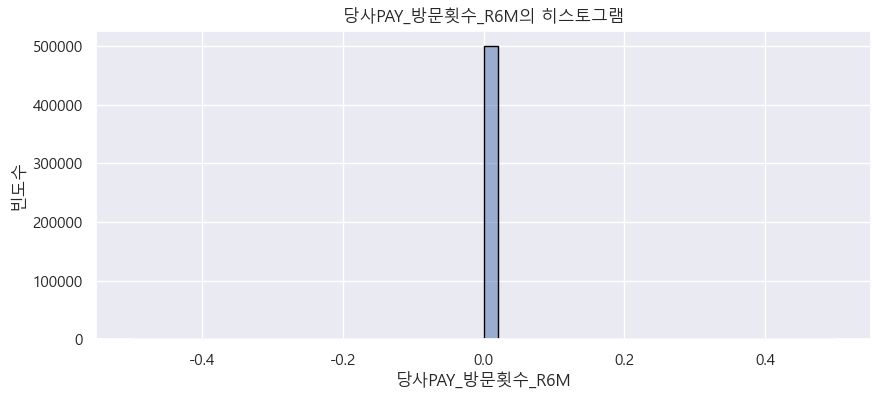

당사PAY_방문횟수_R6M의 박스플롯


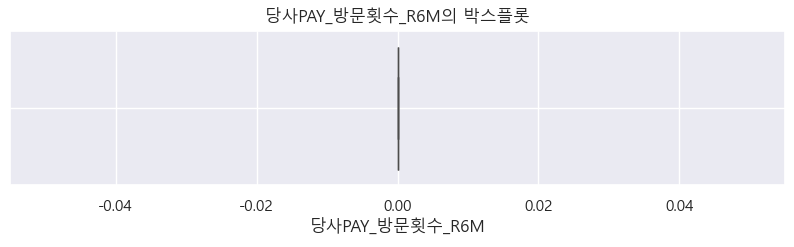

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

당사PAY_방문월수_R6M의 히스토그램


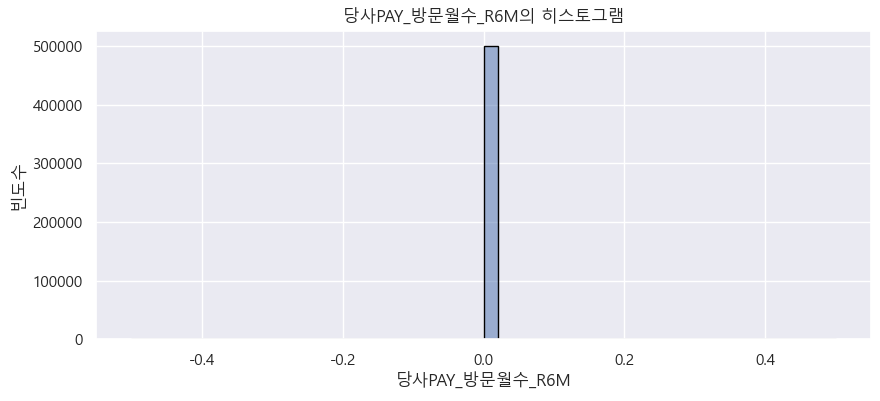

당사PAY_방문월수_R6M의 박스플롯


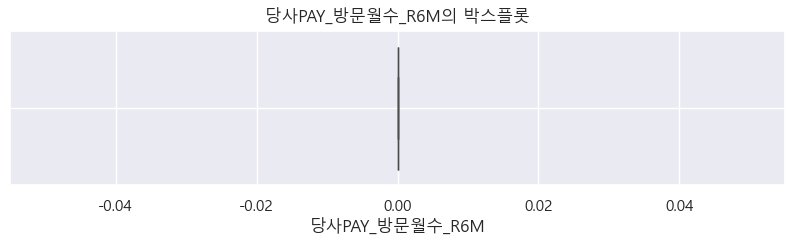

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

당사멤버쉽_방문횟수_B0M의 히스토그램


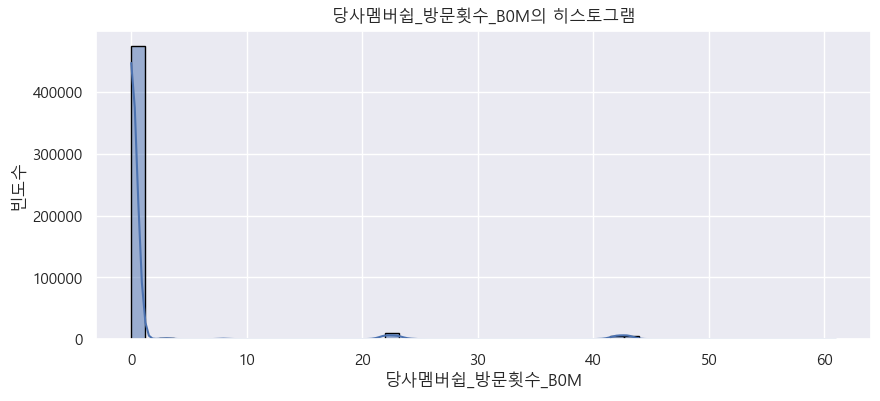

당사멤버쉽_방문횟수_B0M의 박스플롯


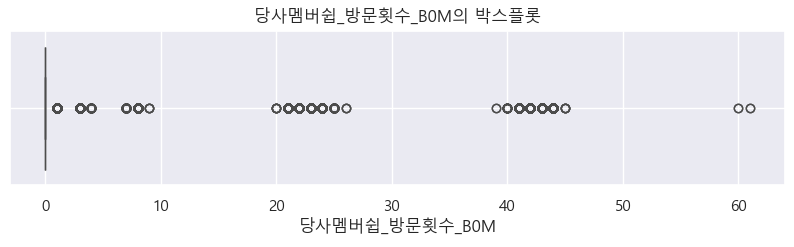

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

당사멤버쉽_방문횟수_R6M의 히스토그램


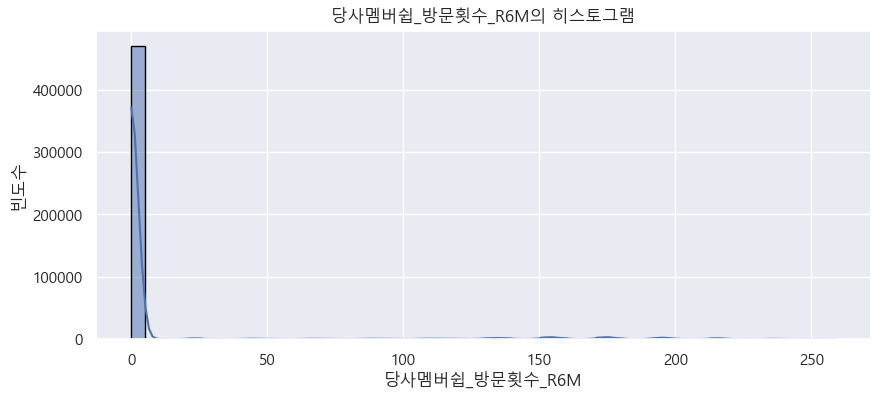

당사멤버쉽_방문횟수_R6M의 박스플롯


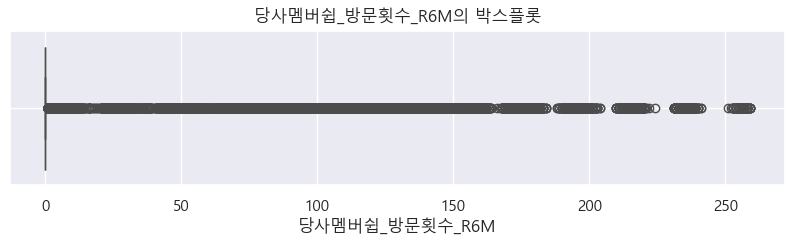

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

당사멤버쉽_방문월수_R6M의 히스토그램


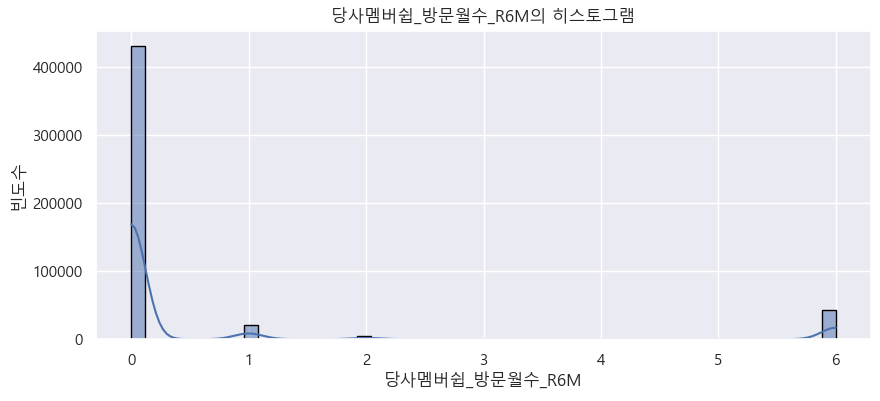

당사멤버쉽_방문월수_R6M의 박스플롯


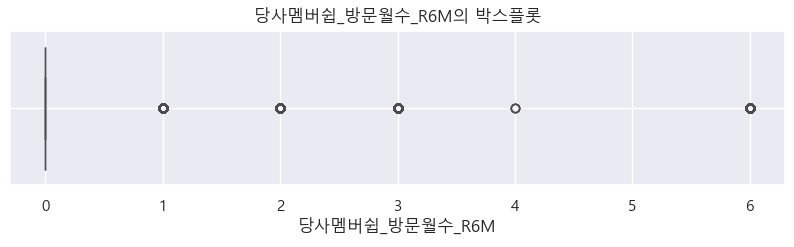

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

홈페이지_금융건수_R6M의 히스토그램


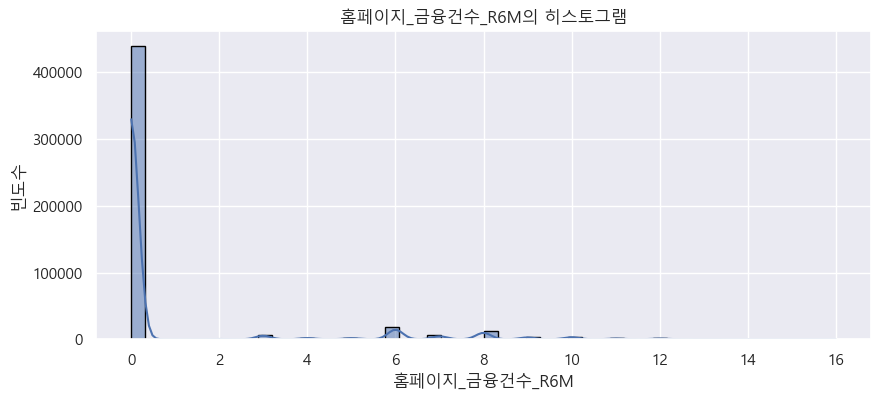

홈페이지_금융건수_R6M의 박스플롯


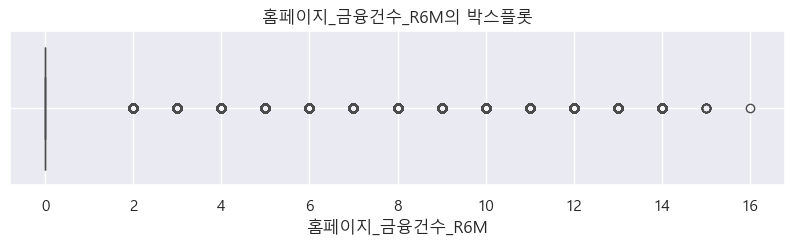

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

홈페이지_선결제건수_R6M의 히스토그램


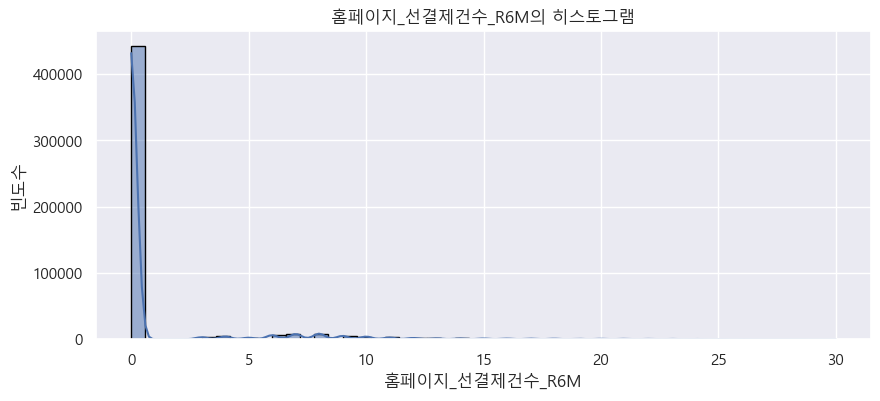

홈페이지_선결제건수_R6M의 박스플롯


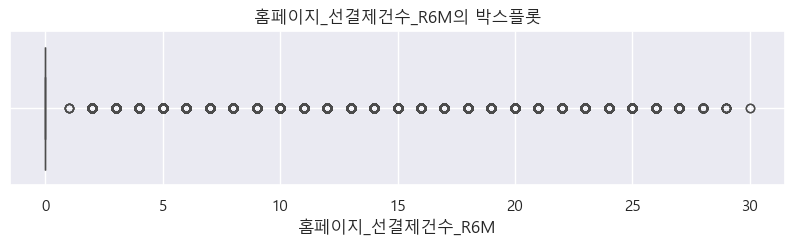

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

홈페이지_금융건수_R3M의 히스토그램


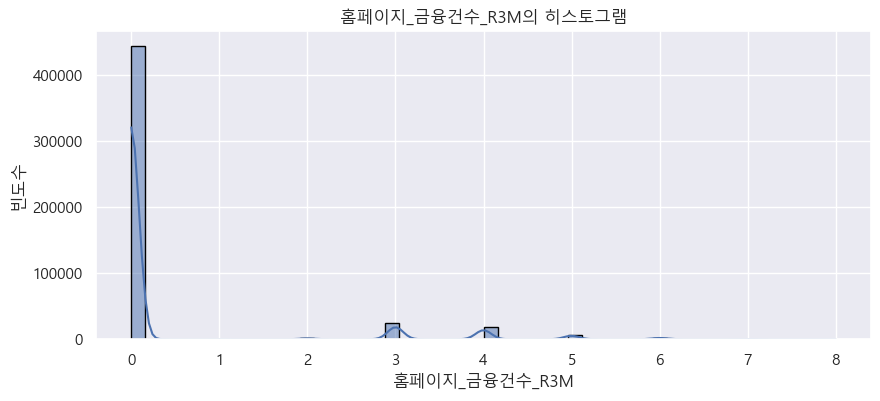

홈페이지_금융건수_R3M의 박스플롯


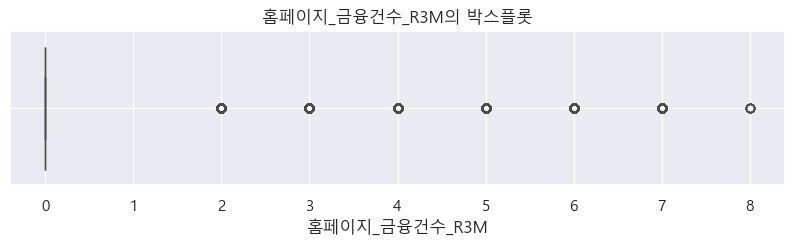

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─

홈페이지_선결제건수_R3M의 히스토그램


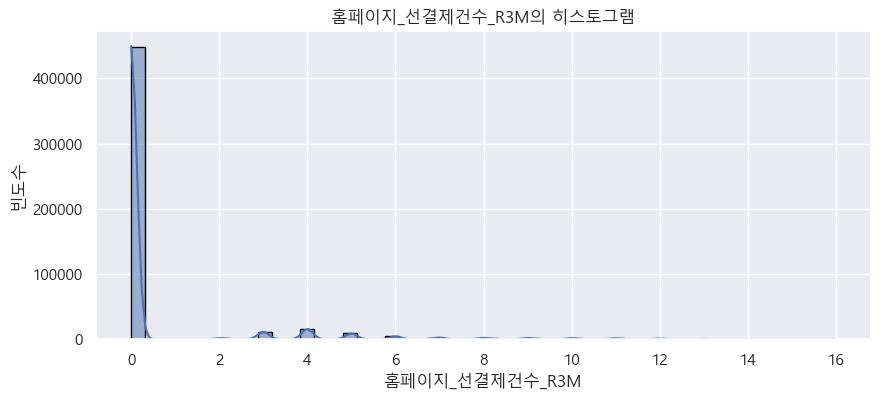

홈페이지_선결제건수_R3M의 박스플롯


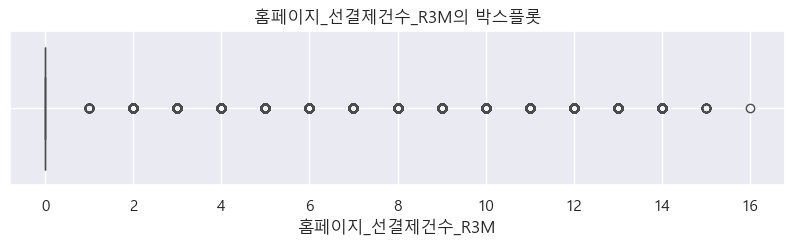

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─



In [8]:
analyze_column(all_df)

In [7]:
def check_categorical_uniques(all_df, max_unique=20):
    cat_cols = all_df.select_dtypes(include='object').columns
    for col in cat_cols:
        uniques = all_df[col].unique()
        print(f'\n▶ {col} ({len(uniques)}개):')
        if len(uniques) <= max_unique:
            print(uniques)
        else:
            print(f'값이 {len(uniques)}개로 너무 많아 생략')

In [9]:
check_categorical_uniques(all_df)


▶ ID (500000개):
값이 500000개로 너무 많아 생략

▶ 인입횟수_ARS_R6M (2개):
['10회 이상' '1회 이상']

▶ 이용메뉴건수_ARS_R6M (4개):
['30회 이상' '1회 이상' '20회 이상' '10회 이상']

▶ 방문횟수_PC_R6M (5개):
['1회 이상' '20회 이상' '30회 이상' '10회 이상' '40회 이상']

▶ 방문일수_PC_R6M (4개):
['1회 이상' '20회 이상' '10회 이상' '30회 이상']

▶ 방문횟수_앱_R6M (9개):
['1회 이상' '40회 이상' '20회 이상' '10회 이상' '30회 이상' '60회 이상' '50회 이상' '70회 이상'
 '80회 이상']

▶ OS구분코드 (3개):
['Android' None 'IOS']
